In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import os

In [2]:
os.getcwd()

'c:\\Users\\hskang\\Desktop\\Coding\\Python AI'

In [3]:
train = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\train.csv')
test = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\test.csv')
bus_bts = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\bus_bts.csv')

train['cue'], test['cue'] = 0, 1

In [4]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [5]:
## Weater Data 생성

# def is_number(num):
#     try:
#         float(num)
#         return True #num을 float으로 변환할 수 있는 경우
#     except ValueError: #num을 float으로 변환할 수 없는 경우
#         return False

# train_weather_data = {'point':[], 'date':[], 'curr_temp':[], 'appa_temp':[], 'rain':[]}
# avg_train_weather_data = {'date':[], 'curr_temp':[], 'appa_temp':[], 'rain':[]}
# for day in train_date:
#     hour = '10'
#     url = url = 'http://www.weather.go.kr/weather/observation/currentweather.jsp?auto_man=m&type=t99&reg=184&tm=' + day.strftime('%Y.%m.%d.') + hour + '%3A00&x=19&y=7'
    
#     source = requests.get(url);
#     soup = bs(source.content, 'html.parser')
#     table = soup.find('table',{'class':'table_develop3'})

#     total_current_temperature, total_apparent_temperature, total_rain = 0, 0, 0
#     for tr in table.find_all('tr'):
#         tds = list(tr.find_all('td'))
#         for td in tds:
#             if td.find('a'):
#                 point = td.find('a').text
#                 current_temperature = tds[5].text
#                 apparent_temperature = tds[7].text
#                 rain = tds[8].text
#                 total_current_temperature += float(current_temperature)
#                 total_apparent_temperature += float(apparent_temperature)
#                 if is_number(rain):
#                     total_rain += float(rain)
#                 print(day, point, current_temperature, apparent_temperature, rain)
#                 train_weather_data['point'].append(point)
#                 train_weather_data['date'].append(day)
#                 train_weather_data['curr_temp'].append(current_temperature)
#                 train_weather_data['appa_temp'].append(apparent_temperature)
#                 train_weather_data['rain'].append(rain)
#     avg_train_weather_data['date'].append(day)
#     avg_train_weather_data['curr_temp'].append(total_current_temperature / 4)
#     avg_train_weather_data['appa_temp'].append(total_apparent_temperature / 4)
#     avg_train_weather_data['rain'].append(total_rain / 4)



# test_weather_data = {'point':[], 'date':[], 'curr_temp':[], 'appa_temp':[], 'rain':[]}
# avg_test_weather_data = {'date':[], 'curr_temp':[], 'appa_temp':[], 'rain':[]}
# for day in test_date:
#     hour = '10'
#     url = url = 'http://www.weather.go.kr/weather/observation/currentweather.jsp?auto_man=m&type=t99&reg=184&tm=' + day.strftime('%Y.%m.%d.') + hour + '%3A00&x=19&y=7'
    
#     data = []
#     source = requests.get(url);
#     soup = bs(source.content, 'html.parser')
#     table = soup.find('table',{'class':'table_develop3'})

    
#     total_current_temperature, total_apparent_temperature, total_rain = 0, 0, 0
#     total_apparent_temperature, total_rain = 0, 0
#     for tr in table.find_all('tr'):
#         tds = list(tr.find_all('td'))
#         for td in tds:
#             if td.find('a'):
#                 point = td.find('a').text
#                 apparent_temperature = tds[7].text
#                 rain = tds[8].text
#                 total_current_temperature += float(current_temperature)
#                 total_apparent_temperature += float(apparent_temperature)
#                 if is_number(rain):
#                     total_rain += float(rain)
#                 print(day, point, current_temperature, apparent_temperature, rain)
#                 test_weather_data['point'].append(point)
#                 test_weather_data['date'].append(day)
#                 test_weather_data['curr_temp'].append(current_temperature)
#                 test_weather_data['appa_temp'].append(apparent_temperature)
#                 test_weather_data['rain'].append(rain)
#     avg_test_weather_data['date'].append(day)
#     avg_test_weather_data['curr_temp'].append(total_current_temperature / 4)
#     avg_test_weather_data['appa_temp'].append(total_apparent_temperature / 4)
#     avg_test_weather_data['rain'].append(total_rain / 4)

# pd.DataFrame(train_weather_data).to_csv('/content/drive/MyDrive/AI Competition 2/Datas/train_weather.csv')
# pd.DataFrame(test_weather_data).to_csv('/content/drive/MyDrive/AI Competition 2/Datas/test_weather.csv')
# pd.DataFrame(avg_train_weather_data).to_csv('/content/drive/MyDrive/AI Competition 2/Datas/avg_train_weather.csv')
# pd.DataFrame(avg_test_weather_data).to_csv('/content/drive/MyDrive/AI Competition 2/Datas/avg_test_weather.csv')

In [6]:
train['weekday'] = train['date'].dt.weekday
test['weekday'] = test['date'].dt.weekday

train['bus_route_id'] = train['bus_route_id'].astype(str)
train['station_code'] = train['station_code'].astype(str)
train['route_station'] = train['bus_route_id'] + ',' + train['station_code']

test['bus_route_id'] = test['bus_route_id'].astype(str)
test['station_code'] = test['station_code'].astype(str)
test['route_station'] = test['bus_route_id'] + ',' + test['station_code']

train['bus_route_id_weekday'] = train['bus_route_id'].astype(str) + ',' + train['weekday'].astype(str) 
test['bus_route_id_weekday'] = test['bus_route_id'].astype(str) + ',' + test['weekday'].astype(str) 

train['station_code_weekday'] = train['station_code'].astype(str) + ',' + train['weekday'].astype(str)
test['station_code_weekday'] = test['station_code'].astype(str) + ',' + test['weekday'].astype(str)

train['route_station_weekday'] = train['route_station'].astype(str) + ',' + train['weekday'].astype(str) 
test['route_station_weekday'] = test['route_station'].astype(str) + ',' + test['weekday'].astype(str)

In [7]:
bus_bts['on_time']  = bus_bts['geton_time'].apply(lambda x : x[:2])

bus_bts.iloc[bus_bts.query('on_time == "06"').index,13] = '6~7_ride'
bus_bts.iloc[bus_bts.query('on_time == "07"').index,13] = '7~8_ride'
bus_bts.iloc[bus_bts.query('on_time == "08"').index,13] = '8~9_ride'
bus_bts.iloc[bus_bts.query('on_time == "09"').index,13] = '9~10_ride'
bus_bts.iloc[bus_bts.query('on_time == "10"').index,13] = '10~11_ride'
bus_bts.iloc[bus_bts.query('on_time == "11"').index,13] = '11~12_ride'

train['68a']=train['6~7_ride']+train['7~8_ride'] 
train['810a']=train['8~9_ride']+train['9~10_ride']
train['1012a']=train['10~11_ride']+train['11~12_ride']

train['68b']=train['6~7_takeoff']+train['7~8_takeoff'] 
train['810b']=train['8~9_takeoff']+train['9~10_takeoff']
train['1012b']=train['10~11_takeoff']+train['11~12_takeoff']

test['68a']=test['6~7_ride']+test['7~8_ride']
test['810a']=test['8~9_ride']+test['9~10_ride']
test['1012a']=test['10~11_ride']+test['11~12_ride']

test['68b']=test['6~7_takeoff']+test['7~8_takeoff']
test['810b']=test['8~9_takeoff']+test['9~10_takeoff']
test['1012b']=test['10~11_takeoff']+test['11~12_takeoff']

In [8]:
def id_statistic(ID, col1, col2) :
    
    # mean, sum
    rs_mean = train.groupby([ID])['18~20_ride'].agg([(col1, 'mean')]).reset_index()
    rs_sum = train.groupby([ID])['18~20_ride'].agg([(col2, 'sum')]).reset_index()
    rs_mean_sum = pd.merge(rs_mean, rs_sum, on=ID)

    # merge
    tr = pd.merge(train, rs_mean_sum, how='left', on=ID)
    te = pd.merge(test, rs_mean_sum, how='left', on=ID)

    # na -&gt; mean
    te[col1] = te[col1].fillna(rs_mean.mean())
    te[col1] = te[col1].fillna(rs_sum.mean())
    
    return tr, te
train, test = id_statistic('route_station', '1820_rs_mean', '1820_rs_sum')
train, test = id_statistic('bus_route_id', '1820_r_mean', '1820_r_sum')
train, test = id_statistic('station_code', '1820_s_mean', '1820_s_sum')
train, test = id_statistic('weekday', '1820_w_mean', '1820_w_sum')

In [9]:
def congestion() :
    df = train.groupby(['bus_route_id'])['18~20_ride'].agg([('passenger', 'sum')])
    df = df.sort_values(by='passenger', ascending=False).reset_index()
    
    def f(x):
        if x > 10000:
            return 7

        elif x > 5000:
            return 6

        elif x > 2000:
            return 5

        elif x > 700:
            return 4

        elif x > 200:
            return 3

        elif x > 50:
            return 2

        else:
            return 1
    
    df['congestion']=df['passenger'].apply(f)
    df = df[['bus_route_id','congestion']]
    
    tr = pd.merge(train, df, how='left', on='bus_route_id')
    te = pd.merge(test, df, how='left', on='bus_route_id')
    
    # 결측치는 데이터 프레임 df의 'congestion'의 중간값인 '4'으로 대체
    te = te.fillna(4)
    
    return tr, te
train, test = congestion()

In [10]:
def morning() :
    
    # merge
    data = pd.concat([train, test])
    
    a = data.groupby(['route_station'])['1012a'].agg({'sum', 'mean'}).reset_index()
    a.columns = ['route_station', '1012a_sum','1012a_mean']

    b = data.groupby(['route_station'])['1012b'].agg({'sum', 'mean'}).reset_index()
    b.columns = ['route_station', '1012b_sum','1012b_mean']
    b = b[['1012b_sum','1012b_mean']]

    c = data.groupby(['route_station'])['10~11_ride'].agg({'sum', 'mean'}).reset_index()
    c.columns = ['route_station', '10~11_ride_sum','10~11_ride_mean']
    c = c[['10~11_ride_sum','10~11_ride_mean']]

    d = data.groupby(['route_station'])['10~11_takeoff'].agg({'sum', 'mean'}).reset_index()
    d.columns = ['route_station', '10~11_takeoff_sum','10~11_takeoff_mean']
    d = d[['10~11_takeoff_sum','10~11_takeoff_mean']]

    e = data.groupby(['route_station'])['11~12_ride'].agg({'sum', 'mean'}).reset_index()
    e.columns = ['route_station', '11~12_ride_sum','11~12_ride_mean']
    e = e[['11~12_ride_sum','11~12_ride_mean']]

    f = data.groupby(['route_station'])['11~12_takeoff'].agg({'sum', 'mean'}).reset_index()
    f.columns = ['route_station', '11~12_takeoff_sum','11~12_takeoff_mean']
    f = f[['11~12_takeoff_sum','11~12_takeoff_mean']]

    g = data.groupby(['route_station'])['1820_r_mean'].agg({'sum', 'mean'}).reset_index()
    g.columns = ['route_station', '1820_r_mean_sum','1820_r_mean_mean']
    g = g[['1820_r_mean_sum','1820_r_mean_mean']]

    h = data.groupby(['route_station'])['1820_r_sum'].agg({'sum', 'mean'}).reset_index()
    h.columns = ['route_station', '1820_r_sum_sum','1820_r_sum_mean']
    h = h[['1820_r_sum_sum','1820_r_sum_mean']]

    i = data.groupby(['route_station'])['1820_rs_mean'].agg({'sum', 'mean'}).reset_index()
    i.columns = ['route_station', '1820_rs_mean_sum','1820_rs_mean_mean']
    i = i[['1820_rs_mean_sum','1820_rs_mean_mean']]

    j = data.groupby(['route_station'])['1820_rs_sum'].agg({'sum', 'mean'}).reset_index()
    j.columns = ['route_station', '1820_rs_sum_sum','1820_rs_sum_mean']
    j = j[['1820_rs_sum_sum','1820_rs_sum_mean']]

    k = data.groupby(['route_station'])['1820_s_mean'].agg({'sum', 'mean'}).reset_index()
    k.columns = ['route_station', '1820_s_mean_sum','1820_s_mean_mean']
    k = k[['1820_s_mean_sum','1820_s_mean_mean']]

    l = data.groupby(['route_station'])['1820_s_sum'].agg({'sum', 'mean'}).reset_index()
    l.columns = ['route_station', '1820_s_sum_sum','1820_s_sum_mean']
    l = l[['1820_s_sum_sum','1820_s_sum_mean']]

    m = data.groupby(['route_station'])['1820_w_mean'].agg({'sum', 'mean'}).reset_index()
    m.columns = ['route_station', '1820_w_mean_sum','1820_w_mean_mean']
    m = m[['1820_w_mean_sum','1820_w_mean_mean']]

    n = data.groupby(['route_station'])['1820_w_sum'].agg({'sum', 'mean'}).reset_index()
    n.columns = ['route_station', '1820_w_sum_sum','1820_w_sum_mean']
    n = n[['1820_w_sum_sum','1820_w_sum_mean']]

    o = data.groupby(['route_station'])['68a'].agg({'sum', 'mean'}).reset_index()
    o.columns = ['route_station', '68a_sum','68a_mean']
    o = o[['68a_sum','68a_mean']]

    p = data.groupby(['route_station'])['68b'].agg({'sum', 'mean'}).reset_index()
    p.columns = ['route_station', '68b_sum','68b_mean']
    p = p[['68b_sum','68b_mean']]

    q = data.groupby(['route_station'])['6~7_ride'].agg({'sum', 'mean'}).reset_index()
    q.columns = ['route_station', '6~7_ride_sum','6~7_ride_mean']
    q = q[['6~7_ride_sum','6~7_ride_mean']]

    r = data.groupby(['route_station'])['6~7_takeoff'].agg({'sum', 'mean'}).reset_index()
    r.columns = ['route_station', '6~7_takeoff_sum','6~7_takeoff_mean']
    r = r[['6~7_takeoff_sum','6~7_takeoff_mean']]

    s = data.groupby(['route_station'])['7~8_ride'].agg({'sum', 'mean'}).reset_index()
    s.columns = ['route_station', '7~8_ride_sum','7~8_ride_mean']
    s = s[['7~8_ride_sum','7~8_ride_mean']]

    t = data.groupby(['route_station'])['7~8_takeoff'].agg({'sum', 'mean'}).reset_index()
    t.columns = ['route_station', '7~8_takeoff_sum','7~8_takeoff_mean']
    t = t[['7~8_takeoff_sum','7~8_takeoff_mean']]

    u = data.groupby(['route_station'])['810a'].agg({'sum', 'mean'}).reset_index()
    u.columns = ['route_station', '810a_sum','810a_mean']
    u = u[['810a_sum','810a_mean']]

    v = data.groupby(['route_station'])['810b'].agg({'sum', 'mean'}).reset_index()
    v.columns = ['route_station', '810b_sum','810b_mean']
    v = v[['810b_sum','810b_mean']]

    w = data.groupby(['route_station'])['8~9_ride'].agg({'sum', 'mean'}).reset_index()
    w.columns = ['route_station', '8~9_ride_sum','8~9_ride_mean']
    w = w[['8~9_ride_sum','8~9_ride_mean']]

    x = data.groupby(['route_station'])['8~9_takeoff'].agg({'sum', 'mean'}).reset_index()
    x.columns = ['route_station', '8~9_takeoff_sum','8~9_takeoff_mean']
    x = x[['8~9_takeoff_sum','8~9_takeoff_mean']]

    y = data.groupby(['route_station'])['9~10_ride'].agg({'sum', 'mean'}).reset_index()
    y.columns = ['route_station', '9~10_ride_sum','9~10_ride_mean']
    y = y[['9~10_ride_sum','9~10_ride_mean']]

    z = data.groupby(['route_station'])['9~10_takeoff'].agg({'sum', 'mean'}).reset_index()
    z.columns = ['route_station', '9~10_takeoff_sum','9~10_takeoff_mean']
    z = z[['9~10_takeoff_sum','9~10_takeoff_mean']]
    
    df = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z],axis=1)
    df = pd.merge(data, df, how='left', on='route_station')

    return df
data = morning()

In [11]:
# train['bus_route_id'] = train['bus_route_id'].astype(np.int64)
# test['bus_route_id'] = test['bus_route_id'].astype(np.int64)

# bus_bts['geton_time2'] = pd.to_datetime(bus_bts['geton_time'])

# f = bus_bts.groupby(['geton_date','geton_time2','geton_station_code','bus_route_id'])['user_count'].agg([('탑승객_수','sum')]).reset_index().sort_values(by=['geton_date','geton_station_code','bus_route_id','geton_time2'], ascending=True).reset_index()

# f['index'] = list(range(0,len(f)))

# time = []

# for i in range(0,len(f)-1):

#     if ((f.iloc[i].geton_date == f.iloc[i+1].geton_date) &\
#         (f.iloc[i].geton_station_code == f.iloc[i+1].geton_station_code) &\
#         (f.iloc[i].bus_route_id == f.iloc[i+1].bus_route_id)):

#         time.append(f.iloc[i+1].geton_time2 - f.iloc[i].geton_time2)

#     else:
#         time.append(0)
 
# time.insert(0, '0')

# def get_sec(time_str):

#     h, m, s = time_str.split(':')

#     return int(h) * 3600 + int(m) * 60 + int(s)

# def bus_interval() :

#     f['time'] = time
#     f['time2'] = f['time'].astype(str).str[7:]


#     interval = f.copy()
#     interval['time2'] = interval['time2'].astype(str).replace('','00:00:00')
#     interval['bus_route_id'] = interval['bus_route_id'].astype(object)

#     time4 = []

#     for i in interval['time2'] :

#         time4.append(get_sec(i))

#     interval['time4'] = time4
#     interval['time4'] = (interval['time4'] / 60).astype(int)

#     interval = interval[interval['time4'] > 3] # 간격이 3분보다 작은 것 제외 
#     interval = interval[interval['time4'] < 180] # 간격이 3시간보다 큰 것 제외

#     interval = interval.groupby('bus_route_id')['time4'].agg([('bus_interval', 'mean')]).reset_index()
#     interval['bus_interval'] = interval['bus_interval'].astype(int)

#     # 나중에 시간을 절약하기 위해 csv 파일로 저장
#     interval.to_csv('/content/drive/MyDrive/AI Competition 2/Datas/bus_interval_final.csv', index = False)

#     print('success.. !')

# bus_interval()

In [12]:
bus_interval = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\bus_interval_final.csv')

In [13]:
data['bus_route_id'] = data['bus_route_id'].astype(np.int64)
data = pd.merge(data, bus_interval, how='left', on='bus_route_id')
data['bus_interval'] = data['bus_interval'].fillna(9999)

In [14]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_encode = data[['bus_route_id','station_code', 'route_station_weekday', 'route_station']]
df_encoded = df_encode.apply(labelencoder.fit_transform)

data['bus_route_id2']=df_encoded['bus_route_id']
data['station_code2']=df_encoded['station_code']
data['route_station_weekday2']=df_encoded['route_station_weekday']
data['route_station2']=df_encoded['route_station']

In [15]:
def weather():
    weather_data = pd.concat([pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\avg_train_weather.csv'), pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\avg_test_weather.csv')])
    weather_data['id'] = range(0, 46)
    a = pd.DataFrame(data.date.unique(), columns=['date'])
    a['id'] = range(0, 46)
    weather_data['date'] = pd.to_datetime(weather_data['date'])


    weather_data = pd.merge(a, weather_data)
    weather_data = weather_data[['date', 'curr_temp', 'appa_temp', 'rain']]
    weather_data = weather_data.replace('', 0)
    df = pd.merge(data, weather_data, on='date')

    labelencoder = LabelEncoder()
    df_encode = df[['curr_temp']]
    df_encoded = df_encode.apply(labelencoder.fit_transform)
    df['curr_temp'] = df_encoded['curr_temp']

    df['curr_temp'] = df['curr_temp'].astype(float)
    df['appa_temp'] = df['appa_temp'].astype(float)
    df['rain'] = df['rain'].astype(float)

    return df

data = weather()

data

,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,9~10_ride,...,9~10_takeoff_sum,9~10_takeoff_mean,bus_interval,bus_route_id2,station_code2,route_station_weekday2,route_station2,curr_temp,appa_temp,rain
0,0,2019-09-01,4270000,시외,344,제주썬호텔,0.0,1.0,2.0,5.0,...,0.065217,3.0,34.0,0,2499,161004,31053,16.0,27.325,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,1.0,4.0,4.0,2.0,...,0.065217,3.0,34.0,0,2618,161011,31054,16.0,27.325,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,1.0,1.0,0.0,2.0,...,0.043478,2.0,34.0,0,2976,161026,31057,16.0,27.325,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),0.0,17.0,6.0,26.0,...,0.000000,0.0,34.0,0,587,160799,31020,16.0,27.325,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,0.0,0.0,0.0,0.0,...,0.666667,26.0,34.0,0,652,160813,31022,16.0,27.325,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,시내,786,고산환승정류장(고산1리),0.0,0.0,0.0,0.0,...,0.000000,0.0,8.0,630,3396,160774,31016,7.0,19.675,0.0
643589,643589,2019-10-16,32820000,시내,1080,애월고등학교,0.0,0.0,0.0,0.0,...,0.000000,0.0,8.0,630,83,160707,31001,7.0,19.675,0.0
643590,643590,2019-10-16,32820000,시내,1129,한림환승정류장(한림리),3.0,0.0,0.0,0.0,...,0.000000,0.0,8.0,630,137,160714,31002,7.0,19.675,0.0
643591,643591,2019-10-16,32820000,시내,1564,제주시외버스터미널,3.0,0.0,0.0,0.0,...,0.000000,0.0,8.0,630,571,160721,31003,7.0,19.675,0.0


In [16]:
data['date'] = pd.to_datetime(data['date'])
data['weekday'] = data['date'].dt.weekday
data = pd.get_dummies(data, columns=['weekday'])
data['weekday'] = data['date'].dt.weekday

In [17]:
data['in_out'].value_counts()
data['in_out'] = data['in_out'].map({'시내':0, '시외':1})

In [18]:
data['ride_sum'] = data['6~7_ride'] + data['7~8_ride'] + data['8~9_ride'] + data['9~10_ride'] + data['10~11_ride'] + data['11~12_ride'] 
data['takeoff_sum'] = data['6~7_takeoff'] + data['7~8_takeoff'] + data['8~9_takeoff'] + data['9~10_takeoff'] + data['10~11_takeoff'] + data['11~12_takeoff'] 
data['remain_sum'] = data['ride_sum'] - data['takeoff_sum']

f = data.groupby('date')['6~7_ride'].agg([('6~7_all_ride_number', 'sum')]).reset_index()
data = pd.merge(data, f, how='left')

f = data.groupby('date')['7~8_ride'].agg([('7~8_all_ride_number', 'sum')]).reset_index()
data = pd.merge(data, f, how='left')

f = data.groupby('date')['8~9_ride'].agg([('8~9_all_ride_number', 'sum')]).reset_index()
data = pd.merge(data, f, how='left')

f = data.groupby('date')['9~10_ride'].agg([('9~10_all_ride_number', 'sum')]).reset_index()
data = pd.merge(data, f, how='left')

f = data.groupby('date')['10~11_ride'].agg([('10~11_all_ride_number', 'sum')]).reset_index()
data = pd.merge(data, f, how='left')

In [19]:
data['weekend'] = np.where((data['weekday'] == 5) | (data['weekday'] == 6), 1, 0)
holiday = ['2019-09-12','2019-09-13','2019-09-14','2019-10-03','2019-10-09']
data['holiday'] = np.where(data['date'].isin(holiday), 1, 0)

In [20]:
def week_mean():
    df = data.reset_index(drop=True)
    df.groupby('weekday')['18~20_ride'].mean()
    df['weekdaymean'] = 1

    index0 = df.query('weekday==0').index
    index1 = df.query('weekday==1').index
    index2 = df.query('weekday==2').index
    index3 = df.query('weekday==3').index
    index4 = df.query('weekday==4').index
    index5 = df.query('weekday==5').index
    index6 = df.query('weekday==6').index

    df.iloc[index0,-1] = 1.343710
    df.iloc[index1,-1] = 1.375319
    df.iloc[index2,-1] = 1.430856
    df.iloc[index3,-1] = 1.256710
    df.iloc[index4,-1] = 1.067439
    df.iloc[index5,-1] = 1.062123
    df.iloc[index6,-1] = 1.034282

    return df
data = week_mean()
data

,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,9~10_ride,...,takeoff_sum,remain_sum,6~7_all_ride_number,7~8_all_ride_number,8~9_all_ride_number,9~10_all_ride_number,10~11_all_ride_number,weekend,holiday,weekdaymean
0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,5.0,...,0.0,16.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282
1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,2.0,...,0.0,22.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282
2,2,2019-09-01,4270000,1,432,정존마을,1.0,1.0,0.0,2.0,...,0.0,4.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),0.0,17.0,6.0,26.0,...,0.0,79.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,0.0,0.0,0.0,0.0,...,1.0,-1.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,0,786,고산환승정류장(고산1리),0.0,0.0,0.0,0.0,...,3.0,-3.0,4771.0,14195.0,12602.0,9143.0,7757.0,0,0,1.430856
643589,643589,2019-10-16,32820000,0,1080,애월고등학교,0.0,0.0,0.0,0.0,...,1.0,-1.0,4771.0,14195.0,12602.0,9143.0,7757.0,0,0,1.430856
643590,643590,2019-10-16,32820000,0,1129,한림환승정류장(한림리),3.0,0.0,0.0,0.0,...,0.0,3.0,4771.0,14195.0,12602.0,9143.0,7757.0,0,0,1.430856
643591,643591,2019-10-16,32820000,0,1564,제주시외버스터미널,3.0,0.0,0.0,0.0,...,0.0,3.0,4771.0,14195.0,12602.0,9143.0,7757.0,0,0,1.430856


In [21]:
data['in_out_mean'] = 1
inindex = data.query('in_out == "시내"').index
outindex = data.query('in_out == "시외"').index

data.iloc[inindex, -1] = 1.228499
data.iloc[outindex, -1] = 2.044345

data['congestion'] = data['congestion'].astype('int64')

print(data.shape)
data

(643593, 119)


,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,9~10_ride,...,remain_sum,6~7_all_ride_number,7~8_all_ride_number,8~9_all_ride_number,9~10_all_ride_number,10~11_all_ride_number,weekend,holiday,weekdaymean,in_out_mean
0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,5.0,...,16.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0
1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,2.0,...,22.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0
2,2,2019-09-01,4270000,1,432,정존마을,1.0,1.0,0.0,2.0,...,4.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),0.0,17.0,6.0,26.0,...,79.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,0.0,0.0,0.0,0.0,...,-1.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,0,786,고산환승정류장(고산1리),0.0,0.0,0.0,0.0,...,-3.0,4771.0,14195.0,12602.0,9143.0,7757.0,0,0,1.430856,1.0
643589,643589,2019-10-16,32820000,0,1080,애월고등학교,0.0,0.0,0.0,0.0,...,-1.0,4771.0,14195.0,12602.0,9143.0,7757.0,0,0,1.430856,1.0
643590,643590,2019-10-16,32820000,0,1129,한림환승정류장(한림리),3.0,0.0,0.0,0.0,...,3.0,4771.0,14195.0,12602.0,9143.0,7757.0,0,0,1.430856,1.0
643591,643591,2019-10-16,32820000,0,1564,제주시외버스터미널,3.0,0.0,0.0,0.0,...,3.0,4771.0,14195.0,12602.0,9143.0,7757.0,0,0,1.430856,1.0


In [22]:
def category_people():
    bus_bts['bus_route_id'] = bus_bts['bus_route_id'].astype(str)

    f = bus_bts.groupby(['bus_route_id', 'user_category'])['user_count'].agg([('승객수', 'sum')]).reset_index()

    g = pd.pivot_table(f, values='승객수', index='bus_route_id', columns='user_category', fill_value=0).reset_index()
    g.columns = ['bus_route_id', 'adult', 'kids', 'teen', 'elder', 'jang', 'jang2', 'ugong', 'ugong2']
    g = g[['bus_route_id', 'adult', 'kids', 'teen', 'elder']]

    df = pd.merge(data, g, how='left', on='bus_route_id')

    df['adult'] = df['adult'].fillna(2363.077778)
    df['kids'] = df['kids'].fillna(60.426984)
    df['teen'] = df['teen'].fillna(448.277778)
    df['elder'] = df['elder'].fillna(751.309524)

    return df

data['bus_route_id'] = data['bus_route_id'].astype(str)
data = category_people()

print(data.shape)
data

(643593, 123)


,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,9~10_ride,...,9~10_all_ride_number,10~11_all_ride_number,weekend,holiday,weekdaymean,in_out_mean,adult,kids,teen,elder
0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,5.0,...,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0
1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,2.0,...,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0
2,2,2019-09-01,4270000,1,432,정존마을,1.0,1.0,0.0,2.0,...,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),0.0,17.0,6.0,26.0,...,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,0.0,0.0,0.0,0.0,...,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,0,786,고산환승정류장(고산1리),0.0,0.0,0.0,0.0,...,9143.0,7757.0,0,0,1.430856,1.0,235.0,0.0,37.0,0.0
643589,643589,2019-10-16,32820000,0,1080,애월고등학교,0.0,0.0,0.0,0.0,...,9143.0,7757.0,0,0,1.430856,1.0,235.0,0.0,37.0,0.0
643590,643590,2019-10-16,32820000,0,1129,한림환승정류장(한림리),3.0,0.0,0.0,0.0,...,9143.0,7757.0,0,0,1.430856,1.0,235.0,0.0,37.0,0.0
643591,643591,2019-10-16,32820000,0,1564,제주시외버스터미널,3.0,0.0,0.0,0.0,...,9143.0,7757.0,0,0,1.430856,1.0,235.0,0.0,37.0,0.0


In [23]:
def category_people_ratio():
    a = bus_bts.groupby('bus_route_id')['user_count'].agg([('전체', 'sum')]).reset_index()
    b = bus_bts.groupby(['bus_route_id', 'user_category'])['user_count'].agg([('승객수', 'sum')]).reset_index()

    c = pd.merge(b, a, on='bus_route_id')
    c['비율'] = c['승객수'] / c['전체']
    c = pd.pivot_table(c, values='비율', index='bus_route_id', columns='user_category', fill_value=0).reset_index()
    c.columns = ['bus_route_id', 'adult_prop','kids_prop','teen_prop','elder_prop','jang_prop','jang2_prop','ugong_prop','ugong2_prop']
    f = c[['bus_route_id', 'adult_prop','kids_prop','teen_prop','elder_prop']]

    df = pd.merge(data, f, how='left', on='bus_route_id')

    df['adult_prop'] = df['adult_prop'].fillna(0.549702)
    df['kids_prop'] = df['kids_prop'].fillna(60.426984)
    df['teen_prop'] = df['teen_prop'].fillna(0.019902)
    df['elder_prop'] = df['elder_prop'].fillna(0.235848)

    return df

data = category_people_ratio()
print(data.shape)
data

(643593, 127)


,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,9~10_ride,...,weekdaymean,in_out_mean,adult,kids,teen,elder,adult_prop,kids_prop,teen_prop,elder_prop
0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,5.0,...,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0
1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,2.0,...,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0
2,2,2019-09-01,4270000,1,432,정존마을,1.0,1.0,0.0,2.0,...,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),0.0,17.0,6.0,26.0,...,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,0.0,0.0,0.0,0.0,...,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,0,786,고산환승정류장(고산1리),0.0,0.0,0.0,0.0,...,1.430856,1.0,235.0,0.0,37.0,0.0,0.863971,0.000000,0.136029,0.0
643589,643589,2019-10-16,32820000,0,1080,애월고등학교,0.0,0.0,0.0,0.0,...,1.430856,1.0,235.0,0.0,37.0,0.0,0.863971,0.000000,0.136029,0.0
643590,643590,2019-10-16,32820000,0,1129,한림환승정류장(한림리),3.0,0.0,0.0,0.0,...,1.430856,1.0,235.0,0.0,37.0,0.0,0.863971,0.000000,0.136029,0.0
643591,643591,2019-10-16,32820000,0,1564,제주시외버스터미널,3.0,0.0,0.0,0.0,...,1.430856,1.0,235.0,0.0,37.0,0.0,0.863971,0.000000,0.136029,0.0


In [24]:
g = data[data['station_name'].str.contains('고등학교')]
highschool = list(g['station_name'].unique())
g = data[data['station_name'].str.contains('대학교')]
university = list(g['station_name'].unique())

data['school'] = np.where((data['station_name'].isin(highschool) | data['station_name'].isin(university)), 1, 0)

g = data[data['station_name'].str.contains('환승')]
transfer = list(g['station_name'].unique())
g = data[data['station_name'].str.contains('공항')]
airport = list(g['station_name'].unique())
g = data[data['station_name'].str.contains('터미널')]
terminal = list(g['station_name'].unique())

data['transfer'] = np.where((data['station_name'].isin(transfer) | data['station_name'].isin(airport) | data['station_name'].isin(terminal)), 1, 0)
print(data.shape)
data

(643593, 129)


,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,9~10_ride,...,adult,kids,teen,elder,adult_prop,kids_prop,teen_prop,elder_prop,school,transfer
0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,5.0,...,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,0
1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,2.0,...,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,0
2,2,2019-09-01,4270000,1,432,정존마을,1.0,1.0,0.0,2.0,...,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,0
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),0.0,17.0,6.0,26.0,...,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,1
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,0.0,0.0,0.0,0.0,...,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,0,786,고산환승정류장(고산1리),0.0,0.0,0.0,0.0,...,235.0,0.0,37.0,0.0,0.863971,0.000000,0.136029,0.0,0,1
643589,643589,2019-10-16,32820000,0,1080,애월고등학교,0.0,0.0,0.0,0.0,...,235.0,0.0,37.0,0.0,0.863971,0.000000,0.136029,0.0,1,0
643590,643590,2019-10-16,32820000,0,1129,한림환승정류장(한림리),3.0,0.0,0.0,0.0,...,235.0,0.0,37.0,0.0,0.863971,0.000000,0.136029,0.0,0,1
643591,643591,2019-10-16,32820000,0,1564,제주시외버스터미널,3.0,0.0,0.0,0.0,...,235.0,0.0,37.0,0.0,0.863971,0.000000,0.136029,0.0,0,1


In [25]:
data['rainy_day'] = np.where(data['rain'] == 0, 0, 1)

data['69a'] = data['6~7_ride']+data['7~8_ride']+data['8~9_ride']
data['912a']=data['9~10_ride']+data['10~11_ride']+data['11~12_ride']

data['69b'] = data['6~7_takeoff']+data['7~8_takeoff']+data['8~9_takeoff']
data['912b'] = data['9~10_takeoff']+data['10~11_takeoff']+data['11~12_takeoff']

In [26]:
data['remain_sum'] = data['ride_sum'] - data['takeoff_sum']

In [27]:
station_count = data['station_code'].value_counts().reset_index(drop=False)
station_count['station_count'] = station_count['station_code']
station_count['station_code'] = station_count['index']
station_count.drop(['index'], axis=1, inplace=True)
data = pd.merge(data, station_count, how='left', on='station_code')

data

,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,9~10_ride,...,teen_prop,elder_prop,school,transfer,rainy_day,69a,912a,69b,912b,station_count
0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,5.0,...,0.004596,0.0,0,0,0,3.0,13.0,0.0,0.0,46
1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,2.0,...,0.004596,0.0,0,0,0,9.0,13.0,0.0,0.0,2303
2,2,2019-09-01,4270000,1,432,정존마을,1.0,1.0,0.0,2.0,...,0.004596,0.0,0,0,0,2.0,2.0,0.0,0.0,1154
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),0.0,17.0,6.0,26.0,...,0.004596,0.0,0,1,0,23.0,56.0,0.0,0.0,49
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,0.0,0.0,0.0,0.0,...,0.004596,0.0,0,0,0,0.0,0.0,0.0,1.0,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,2019-10-16,32820000,0,786,고산환승정류장(고산1리),0.0,0.0,0.0,0.0,...,0.136029,0.0,0,1,0,0.0,0.0,3.0,0.0,325
643589,643589,2019-10-16,32820000,0,1080,애월고등학교,0.0,0.0,0.0,0.0,...,0.136029,0.0,1,0,0,0.0,0.0,1.0,0.0,373
643590,643590,2019-10-16,32820000,0,1129,한림환승정류장(한림리),3.0,0.0,0.0,0.0,...,0.136029,0.0,0,1,0,3.0,0.0,0.0,0.0,725
643591,643591,2019-10-16,32820000,0,1564,제주시외버스터미널,3.0,0.0,0.0,0.0,...,0.136029,0.0,0,1,0,3.0,0.0,0.0,0.0,1109


In [ ]:
# Position.ipynb를 통해 생성한 위치좌표 all_station_position
all_station_position = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\all_station_position.csv')

import geopy.distance
data = pd.merge(data, all_station_position[['station_name', 'latitude', 'longitude']], how='left', on='station_name')
coords_jejusi = (33.500770, 126.522761) #제주시의 위도 경도
data['dis_jejusi'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_jejusi).km for i in range(len(data))]

coords_jejusicheong1 = (33.49892, 126.53035) #제주시청(광양방면)의 위도 경도
coords_jejuairport = (33.50661, 126.49345) #제주국제공항(구제주방면)의 위도 경도
coords_hallahosp = (33.48963, 126.486) #한라병원의 위도 경도
coords_rotary = (33.49143, 126.49678) # 제주도청신제주로터리의 위도 경도
coords_jejucenterhigh = (33.48902, 126.5392) #제주중앙여자고등학교의 위도 경도
coords_jejumarket = (33.51315, 126.52706) #동문시장의 위도 경도
coords_jejusclass = (33.47626, 126.48141) #제주고등학교/중흥S클래스의 위도 경도
coords_centerroad = (33.51073, 126.5239) #중앙로(국민은행)의 위도 경도
coords_fiveway = (33.48667, 126.48092) # 노형오거리의 위도 경도
coords_law = (33.49363, 126.53476) # 제주지방법원(광양방면)의 위도 경도

data['dis_jejusicheong1'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_jejusicheong1).km for i in range(len(data))]
data['dis_jejuairport'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_jejuairport).km for i in range(len(data))]
data['dis_hallahosp'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_hallahosp).km for i in range(len(data))]
data['dis_rotary'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_rotary).km for i in range(len(data))]
data['dis_jejucenterhigh'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_jejucenterhigh).km for i in range(len(data))]
data['dis_jejumarket'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_jejumarket).km for i in range(len(data))]
data['dis_jejusclass'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_jejusclass).km for i in range(len(data))]
data['dis_centerroad'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_centerroad).km for i in range(len(data))]
data['dis_fiveway'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_fiveway).km for i in range(len(data))]
data['dis_law'] = [geopy.distance.geodesic((data['latitude'].iloc[i],data['longitude'].iloc[i]), coords_law).km for i in range(len(data))]

# 16분

In [ ]:
def dist() :
    jeju=(33.51411, 126.52969) # 제주 측정소 근처
    gosan=(33.29382, 126.16283) #고산 측정소 근처
    seongsan=(33.38677, 126.8802) #성산 측정소 근처
    po=(33.24616, 126.5653) #서귀포 측정소 근처

    t1 = [geopy.distance.geodesic( (i,j), jeju).km for i,j in list( zip( data['latitude'],data['longitude'] )) ]
    t2 = [geopy.distance.geodesic( (i,j), gosan).km for i,j in list( zip( data['latitude'],data['longitude'] )) ]
    t3 = [geopy.distance.geodesic( (i,j), seongsan).km for i,j in list( zip( data['latitude'],data['longitude'] )) ]
    t4 = [geopy.distance.geodesic( (i,j), po).km for i,j in list( zip( data['latitude'],data['longitude'] )) ]

    data['dis_jeju'] = t1
    data['dis_gosan']=t2
    data['dis_seongsan']=t3
    data['dis_po']=t4

    total = pd.DataFrame(list(zip( t1,t2,t3,t4)),columns=['jeju','gosan','seongsan','po'] )
    data['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)
    
    return data
data = dist()

,Unnamed: 0,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,...,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law,dis_jeju,dis_gosan,dis_seongsan,dis_po,dist_name
0,0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,...,32.377099,33.627671,32.439756,34.238341,30.486834,32.254470,59.271647,9.936044,23.563915,2
1,1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,...,4.704401,1.500667,4.311319,0.493839,4.639765,4.966766,37.008545,38.465215,27.995521,0
2,2,2,2019-09-01,4270000,1,432,정존마을,1.0,1.0,0.0,...,6.117405,0.939567,5.722959,0.924147,5.872836,6.378644,35.593619,39.264992,27.450969,0
3,3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),0.0,17.0,6.0,...,3.311705,3.432302,2.966855,2.377208,4.149491,3.575035,38.643683,38.386703,29.579578,0
4,4,4,2019-09-01,4270000,0,1646,중문관광단지입구,0.0,0.0,0.0,...,30.465773,25.276766,30.112113,26.384210,28.723795,30.651654,23.648668,45.898680,14.269445,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,643588,2019-10-16,32820000,0,786,고산환승정류장(고산1리),0.0,0.0,0.0,...,39.948063,34.120076,39.552769,34.753565,39.313094,40.208337,1.792904,65.855979,36.384608,1
643589,643589,643589,2019-10-16,32820000,0,1080,애월고등학교,0.0,0.0,0.0,...,18.755738,13.742674,18.396277,13.871700,18.931525,19.020734,24.608411,51.447127,32.217671,0
643590,643590,643590,2019-10-16,32820000,0,1129,한림환승정류장(한림리),3.0,0.0,0.0,...,26.766380,21.319314,26.389188,21.674169,26.634419,27.032910,16.382657,57.381949,33.678653,1
643591,643591,643591,2019-10-16,32820000,0,1564,제주시외버스터미널,3.0,0.0,0.0,...,32.377099,33.627671,32.439756,34.238341,30.486834,32.254470,59.271647,9.936044,23.563915,2


In [ ]:
def f(x):
    if x == 0:
        return 0
    else:
        return 1

data['rain'] = data['rainy_day'].apply(f)
# 데이터 저장
data.to_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\data.csv')

data


,Unnamed: 0,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,...,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law,dis_jeju,dis_gosan,dis_seongsan,dis_po,dist_name
0,0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,...,32.377099,33.627671,32.439756,34.238341,30.486834,32.254470,59.271647,9.936044,23.563915,2
1,1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,...,4.704401,1.500667,4.311319,0.493839,4.639765,4.966766,37.008545,38.465215,27.995521,0
2,2,2,2019-09-01,4270000,1,432,정존마을,1.0,1.0,0.0,...,6.117405,0.939567,5.722959,0.924147,5.872836,6.378644,35.593619,39.264992,27.450969,0
3,3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),0.0,17.0,6.0,...,3.311705,3.432302,2.966855,2.377208,4.149491,3.575035,38.643683,38.386703,29.579578,0
4,4,4,2019-09-01,4270000,0,1646,중문관광단지입구,0.0,0.0,0.0,...,30.465773,25.276766,30.112113,26.384210,28.723795,30.651654,23.648668,45.898680,14.269445,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643588,643588,643588,2019-10-16,32820000,0,786,고산환승정류장(고산1리),0.0,0.0,0.0,...,39.948063,34.120076,39.552769,34.753565,39.313094,40.208337,1.792904,65.855979,36.384608,1
643589,643589,643589,2019-10-16,32820000,0,1080,애월고등학교,0.0,0.0,0.0,...,18.755738,13.742674,18.396277,13.871700,18.931525,19.020734,24.608411,51.447127,32.217671,0
643590,643590,643590,2019-10-16,32820000,0,1129,한림환승정류장(한림리),3.0,0.0,0.0,...,26.766380,21.319314,26.389188,21.674169,26.634419,27.032910,16.382657,57.381949,33.678653,1
643591,643591,643591,2019-10-16,32820000,0,1564,제주시외버스터미널,3.0,0.0,0.0,...,32.377099,33.627671,32.439756,34.238341,30.486834,32.254470,59.271647,9.936044,23.563915,2


# 데이터 병합 및 학습

In [200]:
data = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\data.csv')

In [201]:
# dist_name은 카테고리컬 데이터로 처리하는게 맞다고 판단
data['dist_name_1'] = np.where(data['dist_name'] == 0, 1, 0)
data['dist_name_2'] = np.where(data['dist_name'] == 1, 1, 0)
data['dist_name_3'] = np.where(data['dist_name'] == 2, 1, 0)
data['dist_name_4'] = np.where(data['dist_name'] == 3, 1, 0)

route_count = pd.DataFrame(data['bus_route_id'].value_counts()).reset_index()
route_count['bus_route_id_count'] = route_count['bus_route_id']
route_count['bus_route_id'] = route_count['index']
data = pd.merge(data, route_count[['bus_route_id', 'bus_route_id_count']], how='left', on='bus_route_id')
data

,Unnamed: 0,Unnamed: 0.1,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,route_station,bus_route_id_weekday,station_code_weekday,route_station_weekday,68a,810a,1012a,68b,810b,1012b,1820_rs_mean,1820_rs_sum,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,congestion,1012a_sum,1012a_mean,1012b_sum,1012b_mean,10~11_ride_sum,10~11_ride_mean,10~11_takeoff_sum,10~11_takeoff_mean,11~12_ride_sum,11~12_ride_mean,11~12_takeoff_sum,11~12_takeoff_mean,1820_r_mean_sum,1820_r_mean_mean,1820_r_sum_sum,1820_r_sum_mean,1820_rs_mean_sum,1820_rs_mean_mean,1820_rs_sum_sum,1820_rs_sum_mean,1820_s_mean_sum,1820_s_mean_mean,1820_s_sum_sum,1820_s_sum_mean,1820_w_mean_sum,1820_w_mean_mean,1820_w_sum_sum,1820_w_sum_mean,68a_sum,68a_mean,68b_sum,68b_mean,6~7_ride_sum,6~7_ride_mean,6~7_takeoff_sum,6~7_takeoff_mean,7~8_ride_sum,7~8_ride_mean,7~8_takeoff_sum,7~8_takeoff_mean,810a_sum,810a_mean,810b_sum,810b_mean,8~9_ride_sum,8~9_ride_mean,8~9_takeoff_sum,8~9_takeoff_mean,9~10_ride_sum,9~10_ride_mean,9~10_takeoff_sum,9~10_takeoff_mean,bus_interval,bus_route_id2,station_code2,route_station_weekday2,route_station2,curr_temp,appa_temp,rain,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday,ride_sum,takeoff_sum,remain_sum,6~7_all_ride_number,7~8_all_ride_number,8~9_all_ride_number,9~10_all_ride_number,10~11_all_ride_number,weekend,holiday,weekdaymean,in_out_mean,adult,kids,teen,elder,adult_prop,kids_prop,teen_prop,elder_prop,school,transfer,rainy_day,69a,912a,69b,912b,station_count,latitude_x,longitude_x,dis_jejusi,latitude_y,longitude_y,latitude,longitude,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law,dis_jeju,dis_gosan,dis_seongsan,dis_po,dist_name,dist_name_1,dist_name_2,dist_name_3,dist_name_4,bus_route_id_count
0,0,0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"4270000,344","4270000,6","344,6","4270000,344,6",1.0,7.0,8.0,0.0,0.0,0.0,1.466667,44.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,5,244.0,5.304348,12.0,0.260870,136.0,2.956522,5.0,0.108696,108.0,2.347826,7.0,0.152174,142.801546,3.104381,110814.0,2409.0,67.466667,1.466667,2024.0,44.0,67.466667,1.466667,2024.0,44.0,56.606795,1.230583,3429973.0,74564.630435,204.0,4.434783,6.0,0.130435,75.0,1.630435,0.0,0.000000,129.0,2.804348,6.0,0.130435,258.0,5.608696,3.0,0.065217,137.0,2.978261,0.0,0.000000,121.0,2.630435,3.0,0.065217,34.0,0,2499,161004,31053,16.0,27.325,0,0,0,0,0,0,0,1,6,16.0,0.0,16.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,0,0,3.0,13.0,0.0,0.0,46,33.329732,126.797879,31.854197,33.329732,126.797879,33.329732,126.797879,31.166207,34.446958,34.001925,33.257494,29.851376,32.377099,33.627671,32.439756,34.238341,30.486834,32.254470,59.271647,9.936044,23.563915,2,0,0,1,0,1189
1,1,1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,"4270000,357","4270000,6","357,6","4270000,357,6",5.0,6.0,11.0,0.0,0.0,0.0,5.366667,161.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,5,534.0,11.608696,17.0,0.369565,280.0,6.086957,6.0,0.130435,254.0,5.521739,11.0,0.239130,142.801546,3.104381,110814.0,2409.0,246.866667,5.366667,7406.0,161.0,192.198020,4.178218,291180.0,6330.0,56.606795,1.230583,3429973.0,74564.630435,227.0,4.934783,3.0,0.065217,41.0,0.891304,0.0,0.000000,186.0,4.043478,3.0,0.065217,406.0,8.826087,15.0,0.326087,193.0,4.195652,12.0,0.260870,213.0,4.630435,3.0,0.065217,34.0,0,2618,161011,31054,16.0,27.325,0,0,0,0,0,0,0,1,6,22.0,0.0,22.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,0,0,9.0,13.0,0.0,0.0,2303,33.489435,126.485085,3.720025,33.489435,126.485085,33.489435,126.485085,4.335978,2.057426,0.087742,1.109

In [202]:
# GitHub Competition.ipynb를 통해 새로 생성한 airport 변수를 사용
airport = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\airport.csv')
airport

,Unnamed: 0,date,korean,foreigner,visitor,(t-3),(t-2),(t-1),visitor_3days
0,0,2019-09-01,21768,3262,25030,23304,23785,22271,69360
1,1,2019-09-02,20050,2097,22147,23785,22271,25030,71086
2,2,2019-09-03,16227,3067,19294,22271,25030,22147,69448
3,3,2019-09-04,12992,2079,15071,25030,22147,19294,66471
4,4,2019-09-05,13400,3046,16446,22147,19294,15071,56512
5,5,2019-09-06,16090,2232,18322,19294,15071,16446,50811
6,6,2019-09-07,6043,2865,8908,15071,16446,18322,49839
7,7,2019-09-08,14984,2797,17781,16446,18322,8908,43676
8,8,2019-09-09,12195,2013,14208,18322,8908,17781,45011
9,9,2019-09-10,13128,2417,15545,8908,17781,14208,40897


In [203]:
data = pd.merge(data, airport, how='left', on='date')

In [204]:
data

,Unnamed: 0_x,Unnamed: 0.1,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,route_station,bus_route_id_weekday,station_code_weekday,route_station_weekday,68a,810a,1012a,68b,810b,1012b,1820_rs_mean,1820_rs_sum,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,congestion,1012a_sum,1012a_mean,1012b_sum,1012b_mean,10~11_ride_sum,10~11_ride_mean,10~11_takeoff_sum,10~11_takeoff_mean,11~12_ride_sum,11~12_ride_mean,11~12_takeoff_sum,11~12_takeoff_mean,1820_r_mean_sum,1820_r_mean_mean,1820_r_sum_sum,1820_r_sum_mean,1820_rs_mean_sum,1820_rs_mean_mean,1820_rs_sum_sum,1820_rs_sum_mean,1820_s_mean_sum,1820_s_mean_mean,1820_s_sum_sum,1820_s_sum_mean,1820_w_mean_sum,1820_w_mean_mean,1820_w_sum_sum,1820_w_sum_mean,68a_sum,68a_mean,68b_sum,68b_mean,6~7_ride_sum,6~7_ride_mean,6~7_takeoff_sum,6~7_takeoff_mean,7~8_ride_sum,7~8_ride_mean,7~8_takeoff_sum,7~8_takeoff_mean,810a_sum,810a_mean,810b_sum,810b_mean,8~9_ride_sum,8~9_ride_mean,8~9_takeoff_sum,8~9_takeoff_mean,9~10_ride_sum,9~10_ride_mean,9~10_takeoff_sum,9~10_takeoff_mean,bus_interval,bus_route_id2,station_code2,route_station_weekday2,route_station2,curr_temp,appa_temp,rain,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday,ride_sum,takeoff_sum,remain_sum,6~7_all_ride_number,7~8_all_ride_number,8~9_all_ride_number,9~10_all_ride_number,10~11_all_ride_number,weekend,holiday,weekdaymean,in_out_mean,adult,kids,teen,elder,adult_prop,kids_prop,teen_prop,elder_prop,school,transfer,rainy_day,69a,912a,69b,912b,station_count,latitude_x,longitude_x,dis_jejusi,latitude_y,longitude_y,latitude,longitude,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law,dis_jeju,dis_gosan,dis_seongsan,dis_po,dist_name,dist_name_1,dist_name_2,dist_name_3,dist_name_4,bus_route_id_count,Unnamed: 0_y,korean,foreigner,visitor,(t-3),(t-2),(t-1),visitor_3days
0,0,0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"4270000,344","4270000,6","344,6","4270000,344,6",1.0,7.0,8.0,0.0,0.0,0.0,1.466667,44.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,5,244.0,5.304348,12.0,0.260870,136.0,2.956522,5.0,0.108696,108.0,2.347826,7.0,0.152174,142.801546,3.104381,110814.0,2409.0,67.466667,1.466667,2024.0,44.0,67.466667,1.466667,2024.0,44.0,56.606795,1.230583,3429973.0,74564.630435,204.0,4.434783,6.0,0.130435,75.0,1.630435,0.0,0.000000,129.0,2.804348,6.0,0.130435,258.0,5.608696,3.0,0.065217,137.0,2.978261,0.0,0.000000,121.0,2.630435,3.0,0.065217,34.0,0,2499,161004,31053,16.0,27.325,0,0,0,0,0,0,0,1,6,16.0,0.0,16.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,0,0,3.0,13.0,0.0,0.0,46,33.329732,126.797879,31.854197,33.329732,126.797879,33.329732,126.797879,31.166207,34.446958,34.001925,33.257494,29.851376,32.377099,33.627671,32.439756,34.238341,30.486834,32.254470,59.271647,9.936044,23.563915,2,0,0,1,0,1189,0,21768,3262,25030,23304,23785,22271,69360
1,1,1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,"4270000,357","4270000,6","357,6","4270000,357,6",5.0,6.0,11.0,0.0,0.0,0.0,5.366667,161.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,5,534.0,11.608696,17.0,0.369565,280.0,6.086957,6.0,0.130435,254.0,5.521739,11.0,0.239130,142.801546,3.104381,110814.0,2409.0,246.866667,5.366667,7406.0,161.0,192.198020,4.178218,291180.0,6330.0,56.606795,1.230583,3429973.0,74564.630435,227.0,4.934783,3.0,0.065217,41.0,0.891304,0.0,0.000000,186.0,4.043478,3.0,0.065217,406.0,8.826087,15.0,0.326087,193.0,4.195652,12.0,0.260870,213.0,4.630435,3.0,0.065217,34.0,0,2618,161011,31054,16.0,27.325,0,0,0,0,0,0,0,1,6,22.0,0.0,22.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,0,0,9.0,13.0,0.

In [205]:

# feature_importance 확인 결과 in_out은 중요하지 않음
# 각 정류소별 유니크한 bus_route_id를 카운트, 해당 정류소를 이용할 수 있는 노선의 개수 n_route 생성
n_route = data[["station_code", "bus_route_id"]]
n_route.drop_duplicates(inplace=True)
n_route = n_route.groupby("station_code").count()
n_route = n_route.sort_values(by=["station_code"]).reset_index()
n_route.columns = ["station_code", "n_route"]

data = pd.merge(data, n_route, on='station_code', how='left')
data

<ipython-input-205-c260f57bba6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_route.drop_duplicates(inplace=True)


,Unnamed: 0_x,Unnamed: 0.1,id,date,bus_route_id,in_out,station_code,station_name,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,cue,route_station,bus_route_id_weekday,station_code_weekday,route_station_weekday,68a,810a,1012a,68b,810b,1012b,1820_rs_mean,1820_rs_sum,1820_r_mean,1820_r_sum,1820_s_mean,1820_s_sum,1820_w_mean,1820_w_sum,congestion,1012a_sum,1012a_mean,1012b_sum,1012b_mean,10~11_ride_sum,10~11_ride_mean,10~11_takeoff_sum,10~11_takeoff_mean,11~12_ride_sum,11~12_ride_mean,11~12_takeoff_sum,11~12_takeoff_mean,1820_r_mean_sum,1820_r_mean_mean,1820_r_sum_sum,1820_r_sum_mean,1820_rs_mean_sum,1820_rs_mean_mean,1820_rs_sum_sum,1820_rs_sum_mean,1820_s_mean_sum,1820_s_mean_mean,1820_s_sum_sum,1820_s_sum_mean,1820_w_mean_sum,1820_w_mean_mean,1820_w_sum_sum,1820_w_sum_mean,68a_sum,68a_mean,68b_sum,68b_mean,6~7_ride_sum,6~7_ride_mean,6~7_takeoff_sum,6~7_takeoff_mean,7~8_ride_sum,7~8_ride_mean,7~8_takeoff_sum,7~8_takeoff_mean,810a_sum,810a_mean,810b_sum,810b_mean,8~9_ride_sum,8~9_ride_mean,8~9_takeoff_sum,8~9_takeoff_mean,9~10_ride_sum,9~10_ride_mean,9~10_takeoff_sum,9~10_takeoff_mean,bus_interval,bus_route_id2,station_code2,route_station_weekday2,route_station2,curr_temp,appa_temp,rain,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday,ride_sum,takeoff_sum,remain_sum,6~7_all_ride_number,7~8_all_ride_number,8~9_all_ride_number,9~10_all_ride_number,10~11_all_ride_number,weekend,holiday,weekdaymean,in_out_mean,adult,kids,teen,elder,adult_prop,kids_prop,teen_prop,elder_prop,school,transfer,rainy_day,69a,912a,69b,912b,station_count,latitude_x,longitude_x,dis_jejusi,latitude_y,longitude_y,latitude,longitude,dis_jejusicheong1,dis_jejuairport,dis_hallahosp,dis_rotary,dis_jejucenterhigh,dis_jejumarket,dis_jejusclass,dis_centerroad,dis_fiveway,dis_law,dis_jeju,dis_gosan,dis_seongsan,dis_po,dist_name,dist_name_1,dist_name_2,dist_name_3,dist_name_4,bus_route_id_count,Unnamed: 0_y,korean,foreigner,visitor,(t-3),(t-2),(t-1),visitor_3days,n_route
0,0,0,0,2019-09-01,4270000,1,344,제주썬호텔,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,"4270000,344","4270000,6","344,6","4270000,344,6",1.0,7.0,8.0,0.0,0.0,0.0,1.466667,44.0,3.104381,2409.0,1.466667,44.0,1.034282,54306.0,5,244.0,5.304348,12.0,0.260870,136.0,2.956522,5.0,0.108696,108.0,2.347826,7.0,0.152174,142.801546,3.104381,110814.0,2409.0,67.466667,1.466667,2024.0,44.0,67.466667,1.466667,2024.0,44.0,56.606795,1.230583,3429973.0,74564.630435,204.0,4.434783,6.0,0.130435,75.0,1.630435,0.0,0.000000,129.0,2.804348,6.0,0.130435,258.0,5.608696,3.0,0.065217,137.0,2.978261,0.0,0.000000,121.0,2.630435,3.0,0.065217,34.0,0,2499,161004,31053,16.0,27.325,0,0,0,0,0,0,0,1,6,16.0,0.0,16.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,0,0,3.0,13.0,0.0,0.0,46,33.329732,126.797879,31.854197,33.329732,126.797879,33.329732,126.797879,31.166207,34.446958,34.001925,33.257494,29.851376,32.377099,33.627671,32.439756,34.238341,30.486834,32.254470,59.271647,9.936044,23.563915,2,0,0,1,0,1189,0,21768,3262,25030,23304,23785,22271,69360,1
1,1,1,1,2019-09-01,4270000,1,357,한라병원,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,"4270000,357","4270000,6","357,6","4270000,357,6",5.0,6.0,11.0,0.0,0.0,0.0,5.366667,161.0,3.104381,2409.0,4.178218,6330.0,1.034282,54306.0,5,534.0,11.608696,17.0,0.369565,280.0,6.086957,6.0,0.130435,254.0,5.521739,11.0,0.239130,142.801546,3.104381,110814.0,2409.0,246.866667,5.366667,7406.0,161.0,192.198020,4.178218,291180.0,6330.0,56.606795,1.230583,3429973.0,74564.630435,227.0,4.934783,3.0,0.065217,41.0,0.891304,0.0,0.000000,186.0,4.043478,3.0,0.065217,406.0,8.826087,15.0,0.326087,193.0,4.195652,12.0,0.260870,213.0,4.630435,3.0,0.065217,34.0,0,2618,161011,31054,16.0,27.325,0,0,0,0,0,0,0,1,6,22.0,0.0,22.0,2942.0,4518.0,5682.0,6275.0,6774.0,1,0,1.034282,1.0,8158.0,72.0,38.0,0.0,0.986696,0.008708,0.004596,0.0,0,0,0,9

In [206]:
train_data = data.query('cue==0').reset_index()
test_data = data.query('cue==1').reset_index()

In [207]:
y_train = train_data[['18~20_ride']]

In [208]:
pd.set_option('display.max_columns', 500)
data['rainy_day'][data['rainy_day'] > 1]

Series([], Name: rainy_day, dtype: int64)

In [209]:
input_var_0=[ '68a', '810a', '1012a', '68b', '810b', '1012b', '1820_rs_mean', '1820_rs_sum', '1820_r_mean', '1820_r_sum', '1820_s_mean', '1820_s_sum', 
'1820_w_mean', '1820_w_sum',  '1012a_sum', '1012a_mean', '1012b_sum', '1012b_mean', '10~11_ride_sum', '10~11_ride_mean', '10~11_takeoff_sum', 
'10~11_takeoff_mean', '11~12_ride_sum',	'11~12_ride_mean', '11~12_takeoff_sum', '11~12_takeoff_mean', '1820_r_mean_sum', '1820_r_mean_mean', '1820_r_sum_sum',
'1820_r_sum_mean', '1820_rs_mean_sum', '1820_rs_mean_mean',	'1820_rs_sum_sum', '1820_rs_sum_mean', '1820_s_mean_sum', '1820_s_mean_mean', '1820_s_sum_sum', 
'1820_s_sum_mean', '1820_w_mean_sum', '1820_w_mean_mean', '1820_w_sum_sum', '1820_w_sum_mean', '68a_sum', '68a_mean', '68b_sum', '68b_mean', '6~7_ride_sum', '6~7_ride_mean',
'6~7_takeoff_sum', '6~7_takeoff_mean', '7~8_ride_sum', '7~8_ride_mean',	'7~8_takeoff_sum', '7~8_takeoff_mean', '810a_sum', '810a_mean',	'810b_sum',	'810b_mean', '8~9_ride_sum',
'8~9_ride_mean', '8~9_takeoff_sum',	'8~9_takeoff_mean', '9~10_ride_sum', '9~10_ride_mean', '9~10_takeoff_sum', '9~10_takeoff_mean',	'bus_interval',	'bus_route_id2',
'station_code2', 'route_station_weekday2', 'route_station2', 'curr_temp', 'appa_temp', 'rain', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
'weekday_6', 'remain_sum', '6~7_all_ride_number', '7~8_all_ride_number', '8~9_all_ride_number', '9~10_all_ride_number', '10~11_all_ride_number', 'weekend', 'holiday',
'weekdaymean', 'adult', 'kids', 'teen', 'adult_prop', 'kids_prop', 'teen_prop', 'school', 'transfer', 'rainy_day', '69a', '912a', '69b', '912b', 'bus_route_id_count',
'dis_jejusicheong1', 'dis_jejuairport', 'dis_hallahosp', 'dis_rotary', 'dis_jejucenterhigh',  'dis_jejusclass', 'dis_centerroad', 'dis_fiveway', 'dis_law',
'dis_jeju', 'dis_gosan', 'dis_seongsan', 'dis_po', 'korean', 'foreigner', 'visitor', '(t-3)', '(t-2)', '(t-1)', 'visitor_3days', 'n_route']

# drop_list 
# 'congestion', 'in_out', 'dis_jejumarket', 'weekend'


In [210]:
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

i = 1
total_error = 0

X = np.array(train_data[input_var_0])
Y = np.array(y_train.values.ravel())

lgbm_fold = lgb.LGBMRegressor(  learning_rate=0.05,
                                n_jobs=-1,
                                device_type='gpu',
                                n_estimators=1000,
                                random_state=1, 
                                colsample_bytree=0.78, 
                                subsample=0.6, 
                                max_depth=7)

for train_index, test_index in kfold.split(X):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    lgbm_fold_fit = lgbm_fold.fit(x_train_fold, y_train_fold)
    lgbm_fold_pred = lgbm_fold_fit.predict(x_test_fold)
    error = np.sqrt(mean_squared_error(y_test_fold, lgbm_fold_pred))
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1

print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

# n_estimator : 1000 => 30초 Average Error : 2.1059
#

y_pred = lgbm_fold_fit.predict(test_data[input_var_0])
sub = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\submission_sample.csv')
sub['18~20_ride'] = y_pred
sub.to_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\lgbm.csv', index = False)


Fold = 1, prediction score = 2.11
Fold = 2, prediction score = 2.06
Fold = 3, prediction score = 2.17
Fold = 4, prediction score = 2.18
Fold = 5, prediction score = 2.08
------------------------------
Average Error: 2.11931077881185


In [179]:
import matplotlib.pyplot as plt
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    plt.figure(figsize=(30, 30))
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), list(df.columns))
    plt.xlabel("Feature importances")
    plt.ylabel("Feature")

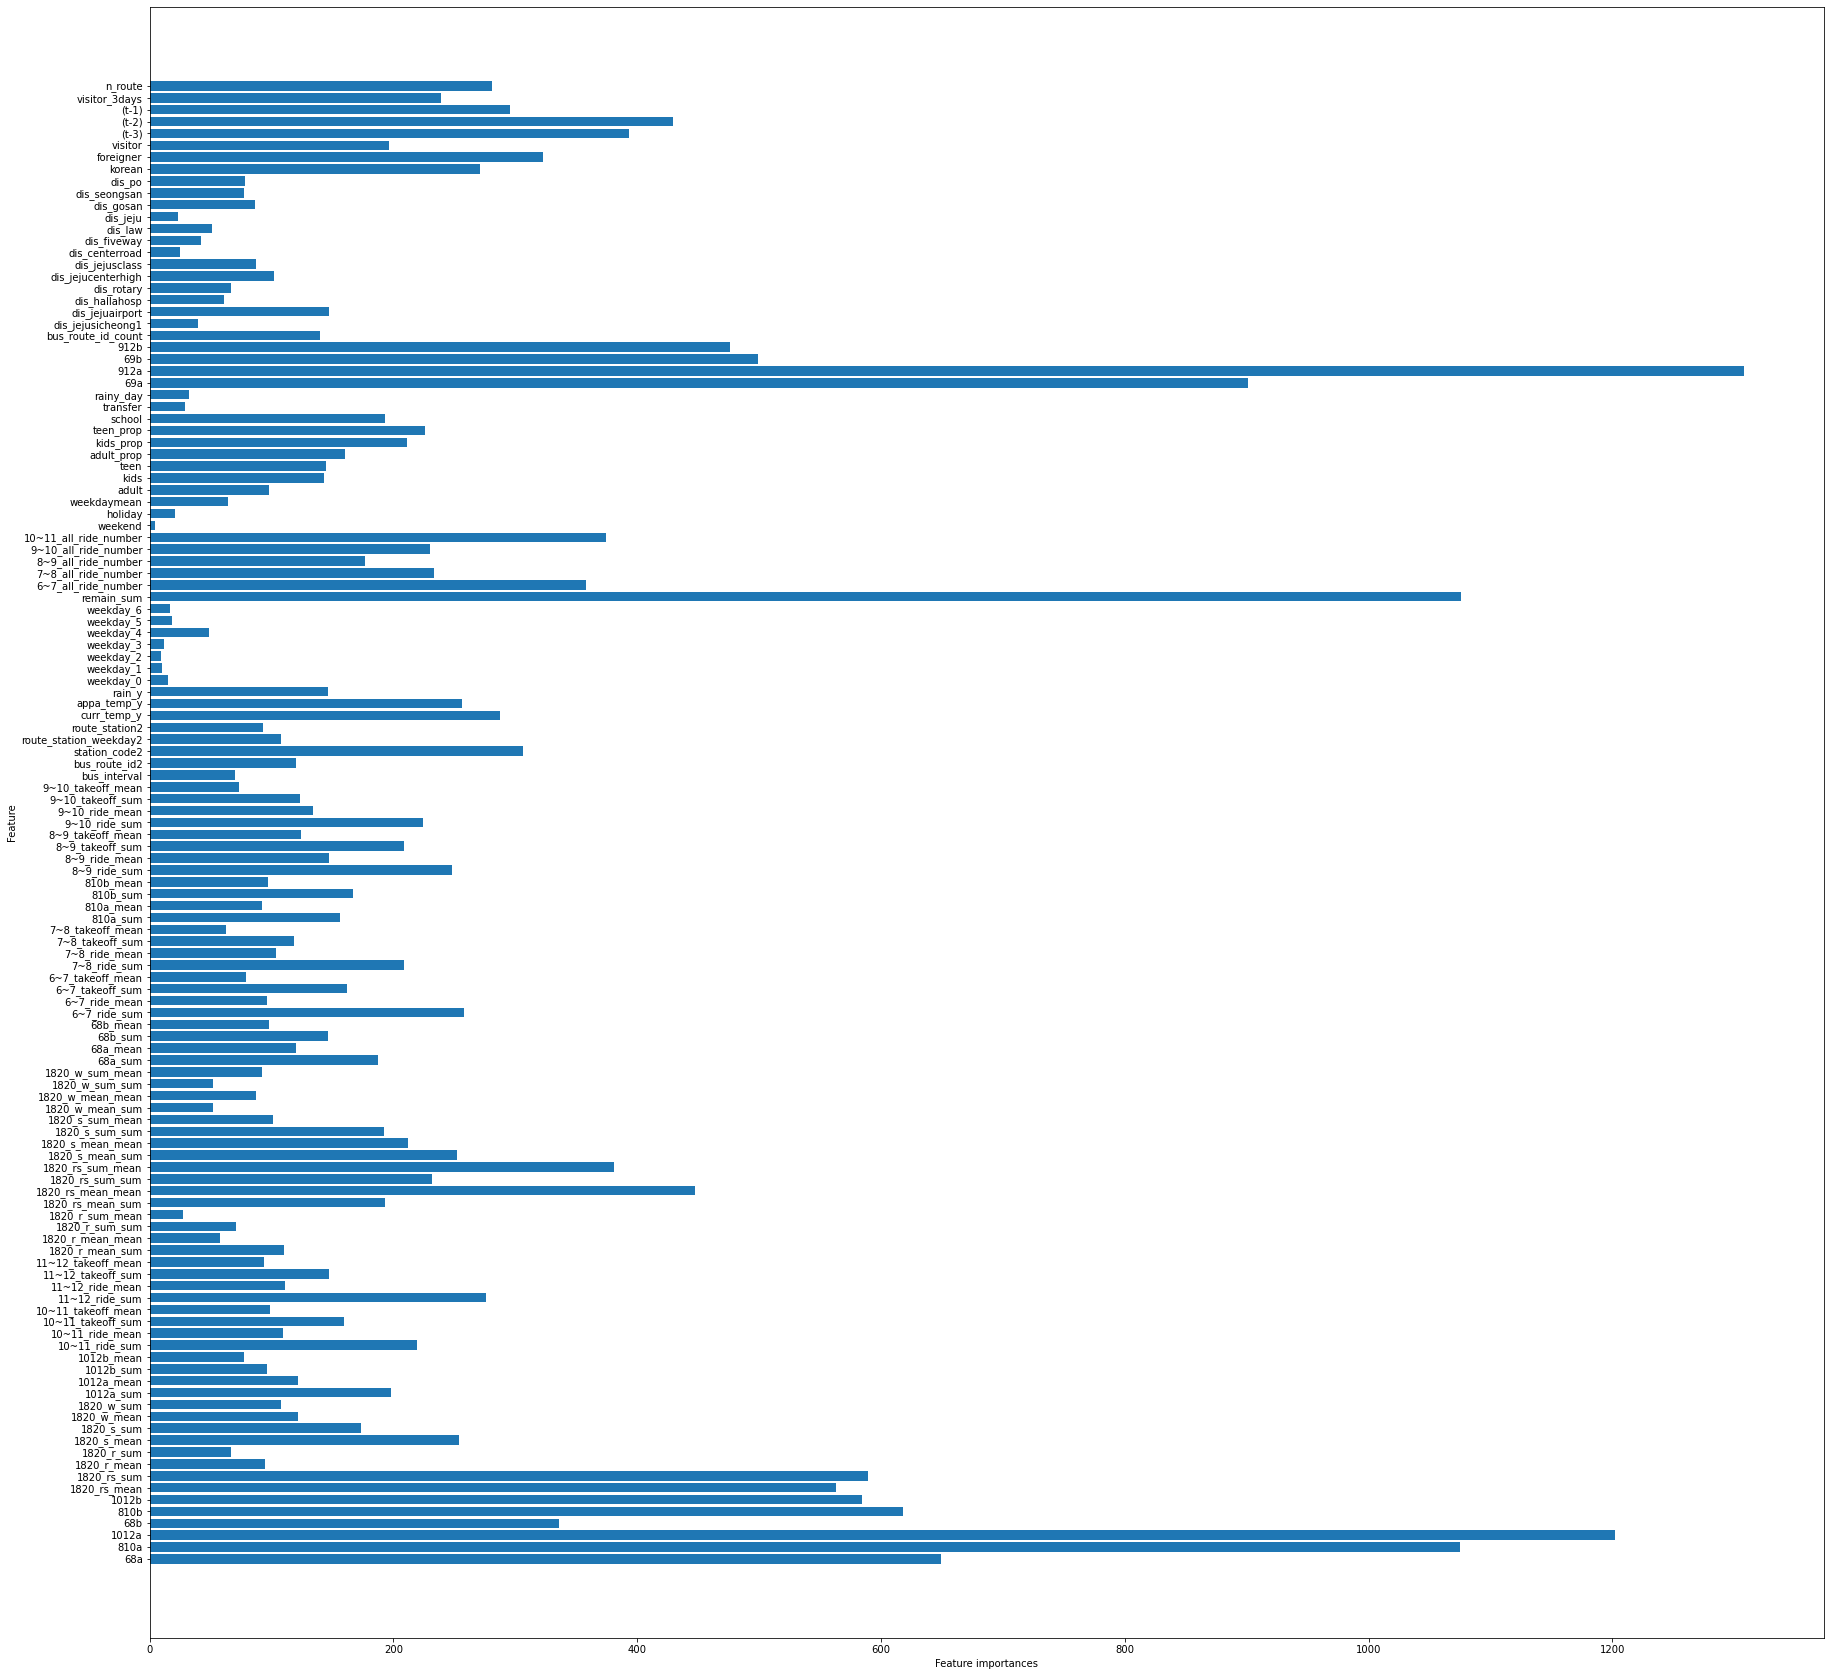

In [180]:
plot_feature_importances(lgbm_fold_fit, train_data[input_var_0])

In [181]:
# from sklearn.model_selection import KFold
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_error

# n_splits = 5
# kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

# i = 1
# total_error = 0

# X = np.array(train_data[input_var_1])
# Y = np.array(y_train.values.ravel())

# lgbm_fold = lgb.LGBMRegressor(  learning_rate=0.05,
#                                 n_jobs=-1,
#                                 device_type='gpu',
#                                 n_estimators=20000,
#                                 random_state=1, 
#                                 colsample_bytree=0.78, 
#                                 subsample=0.7, 
#                                 max_depth=5)

# for train_index, test_index in kfold.split(X):
#     x_train_fold, x_test_fold = X[train_index], X[test_index]
#     y_train_fold, y_test_fold = Y[train_index], Y[test_index]
#     lgbm_fold_fit = lgbm_fold.fit(x_train_fold, y_train_fold)
#     lgbm_fold_pred = lgbm_fold_fit.predict(x_test_fold)
#     error = np.sqrt(mean_squared_error(y_test_fold, lgbm_fold_pred))
#     print('Fold = {}, prediction score = {:.2f}'.format(i, error))
#     total_error += error
#     i+=1

# print('---'*10)
# print('Average Error: %s' % (total_error / n_splits))

# # n_estimator : 10000 =>5분 Average Error : 2.17186
# #


In [182]:
# from sklearn.model_selection import KFold
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_error

# n_splits = 5
# kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

# i = 1
# total_error = 0

# X = np.array(train_data[input_var_2])
# Y = np.array(y_train.values.ravel())

# lgbm_fold = lgb.LGBMRegressor(  learning_rate=0.05,
#                                 n_jobs=-1,
#                                 device_type='gpu',
#                                 n_estimators=20000,
#                                 random_state=1, 
#                                 colsample_bytree=0.78, 
#                                 subsample=0.7, 
#                                 max_depth=5)

# for train_index, test_index in kfold.split(X):
#     x_train_fold, x_test_fold = X[train_index], X[test_index]
#     y_train_fold, y_test_fold = Y[train_index], Y[test_index]
#     lgbm_fold_fit = lgbm_fold.fit(x_train_fold, y_train_fold)
#     lgbm_fold_pred = lgbm_fold_fit.predict(x_test_fold)
#     error = np.sqrt(mean_squared_error(y_test_fold, lgbm_fold_pred))
#     print('Fold = {}, prediction score = {:.2f}'.format(i, error))
#     total_error += error
#     i+=1

# print('---'*10)
# print('Average Error: %s' % (total_error / n_splits))

# # n_estimator : 10000 =>5분 Average Error : 2.17186
# #


In [183]:
from sklearn.ensemble import RandomForestRegressor

n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

i = 1
total_error = 0

X = np.array(train_data[input_var_0])
Y = np.array(y_train.values.ravel())

rfr_fold = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=1)

for train_index, test_index in kfold.split(X):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    rfr_fold_fit = rfr_fold.fit(x_train_fold, y_train_fold)
    rfr_fold_pred = rfr_fold_fit.predict(x_test_fold)
    error = np.sqrt(mean_squared_error(y_test_fold, rfr_fold_pred))
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1

print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

# n_estimator : 200 => 30분 Average Error : 2.165 input_var_0

Fold = 1, prediction score = 2.15
Fold = 2, prediction score = 2.08
Fold = 3, prediction score = 2.19
Fold = 4, prediction score = 2.25
Fold = 5, prediction score = 2.15
------------------------------
Average Error: 2.1635322647809163


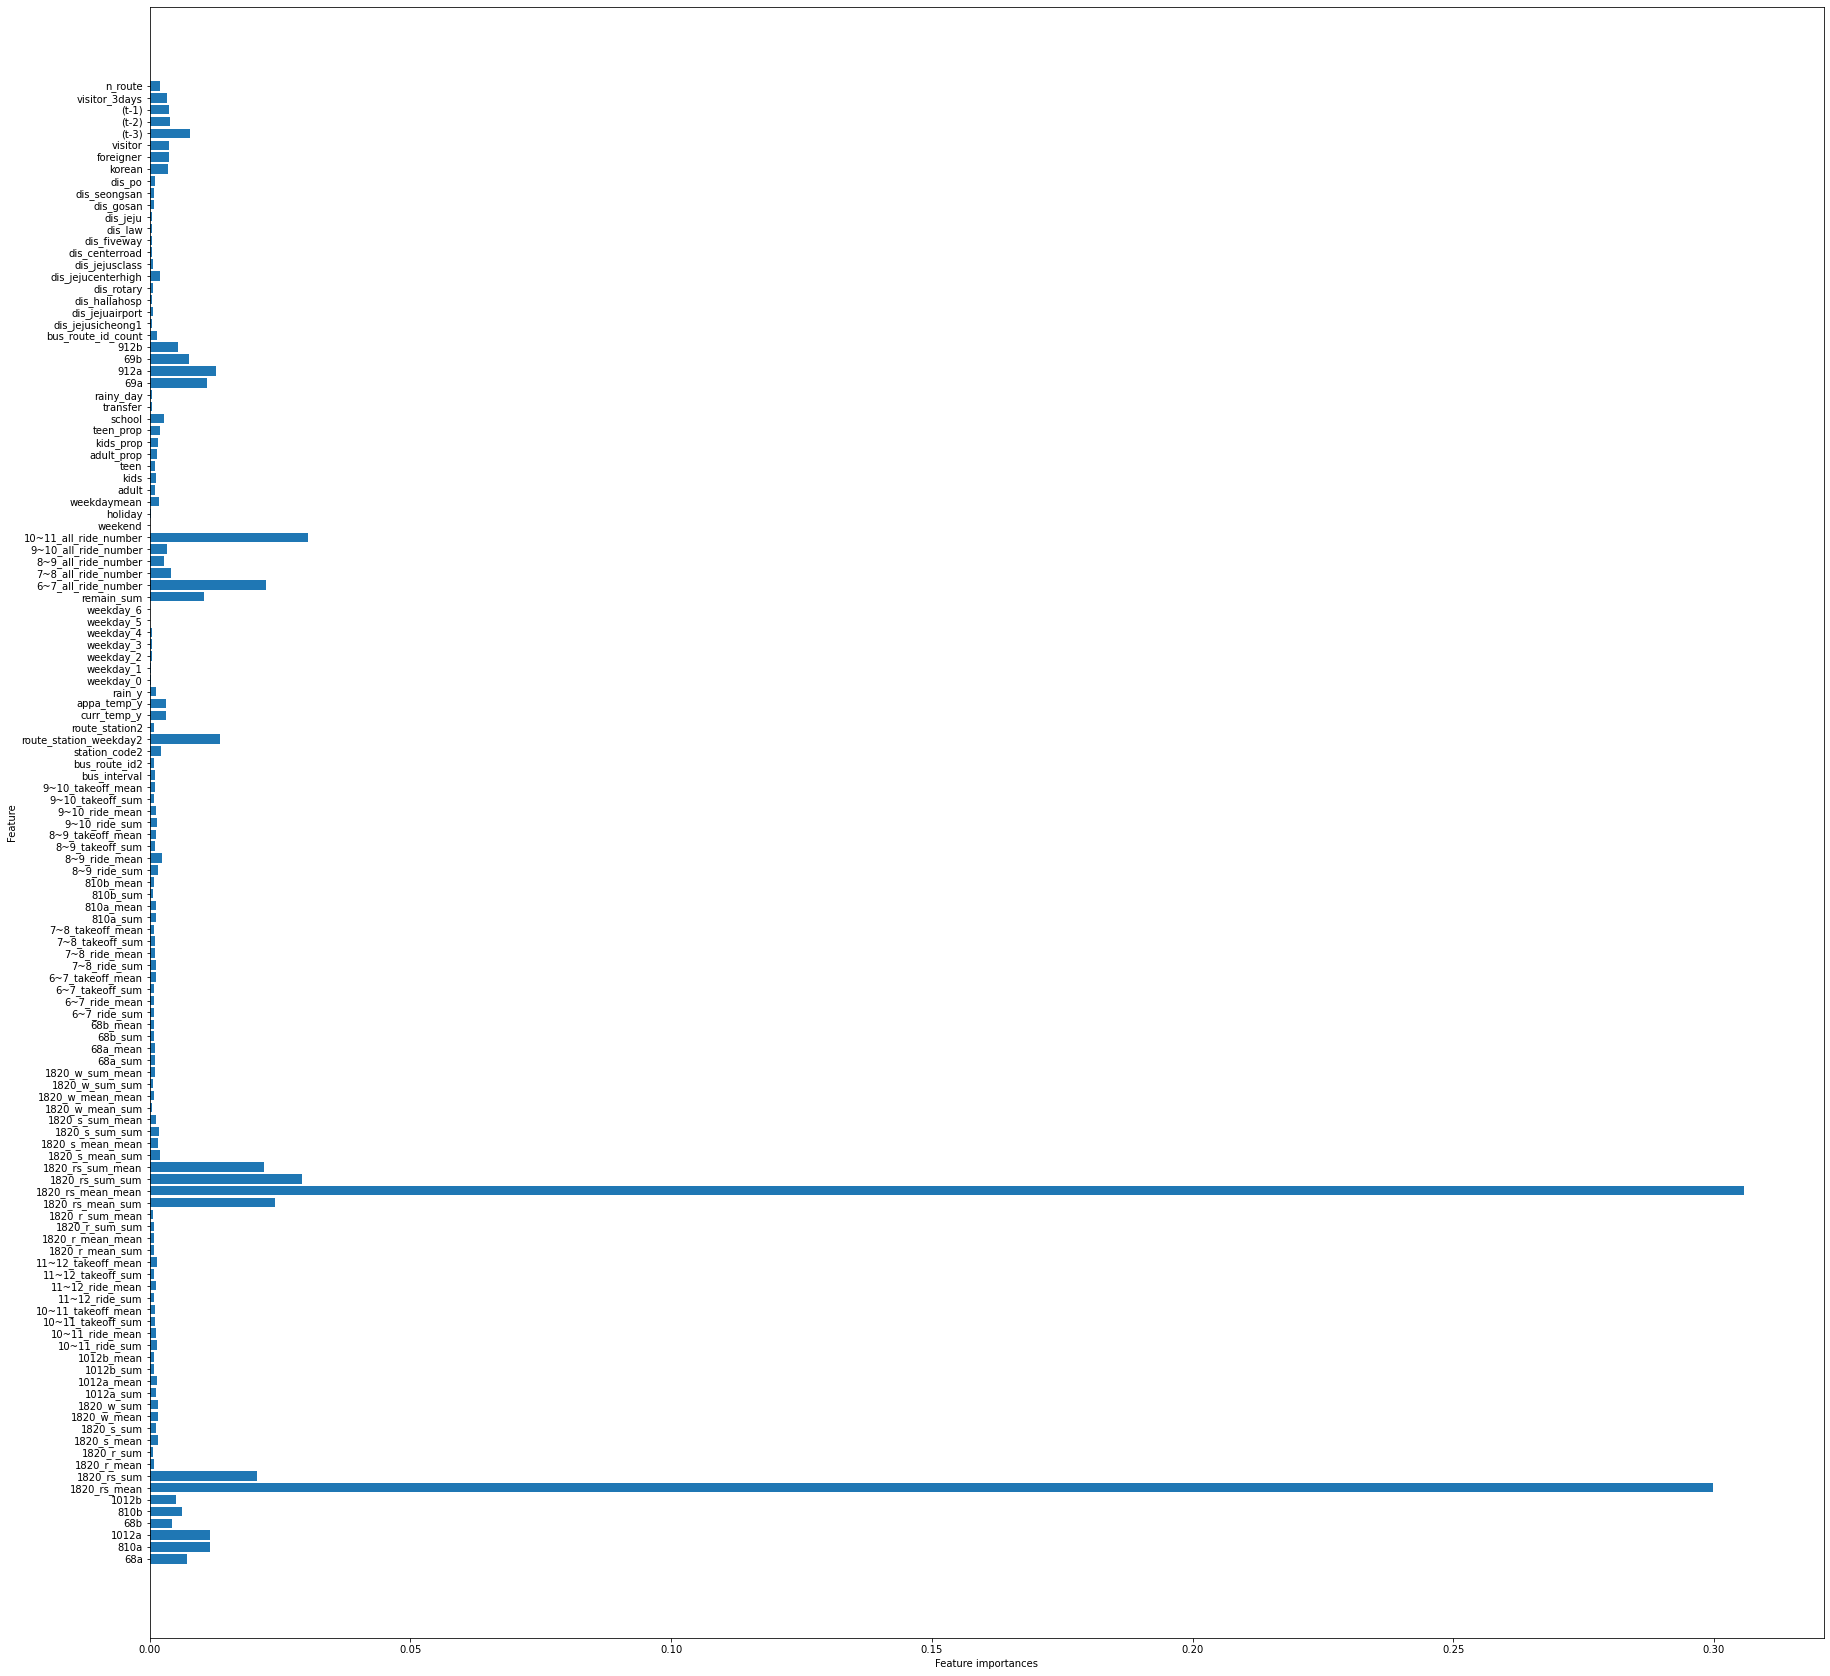

In [184]:
plot_feature_importances(rfr_fold_fit, train_data[input_var_0])

In [185]:
y_pred = rfr_fold_fit.predict(test_data[input_var_0])
sub = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\submission_sample.csv')
sub['18~20_ride'] = y_pred
sub.to_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\rf.csv', index = False)

In [186]:
# from sklearn.ensemble import GradientBoostingRegressor

# n_splits = 5
# kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

# i = 1
# total_error = 0

# X = np.array(train_data[input_var_2])
# Y = np.array(y_train.values.ravel())

# gbr_fold = GradientBoostingRegressor(  learning_rate=0.05,
#                                 n_jobs=-1,
#                                 device_type='gpu',
#                                 n_estimators=200,
#                                 random_state=1, 
#                                 colsample_bytree=0.78, 
#                                 subsample=0.7,
#                                 tree_learner='serial',
#                                 subsample_freq=1,
#                                 reg_lambda=7,
#                                 reg_alpha=5,
#                                 max_depth=5)

# for train_index, test_index in kfold.split(X):
#     x_train_fold, x_test_fold = X[train_index], X[test_index]
#     y_train_fold, y_test_fold = Y[train_index], Y[test_index]
#     gbr_fold_fit = gbr_fold.fit(x_train_fold, y_train_fold)
#     gbr_fold_pred = gbr_fold_fit.predict(x_test_fold)
#     error = np.sqrt(mean_squared_error(y_test_fold, gbr_fold_pred))
#     print('Fold = {}, prediction score = {:.2f}'.format(i, error))
#     total_error += error
#     i+=1

# print('---'*10)
# print('Average Error: %s' % (total_error / n_splits))

# # n_estimator : 100 => 13분 Average Error : 2.2891 input_var_0

In [187]:
from xgboost import XGBRegressor

xgb_fold = XGBRegressor(  learning_rate=0.05,
                                n_jobs=-1,
                                n_estimators=1000,
                                random_state=1, 
                                colsample_bytree=0.78, 
                                subsample=0.7, 
                                max_depth=5)

n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

i = 1
total_error = 0

X = np.array(train_data[input_var_0])
Y = np.array(y_train.values.ravel())

for train_index, test_index in kfold.split(X):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    xgb_fold_fit = xgb_fold.fit(x_train_fold, y_train_fold)
    xgb_fold_pred = xgb_fold_fit.predict(x_test_fold)
    error = np.sqrt(mean_squared_error(y_test_fold, xgb_fold_pred))
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1

print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

# n_estimator : 1000 => 11분 Average Error: 2.1014 input_var_0

Fold = 1, prediction score = 2.06
Fold = 2, prediction score = 2.04
Fold = 3, prediction score = 2.15
Fold = 4, prediction score = 2.18
Fold = 5, prediction score = 2.06
------------------------------
Average Error: 2.0989106188866655


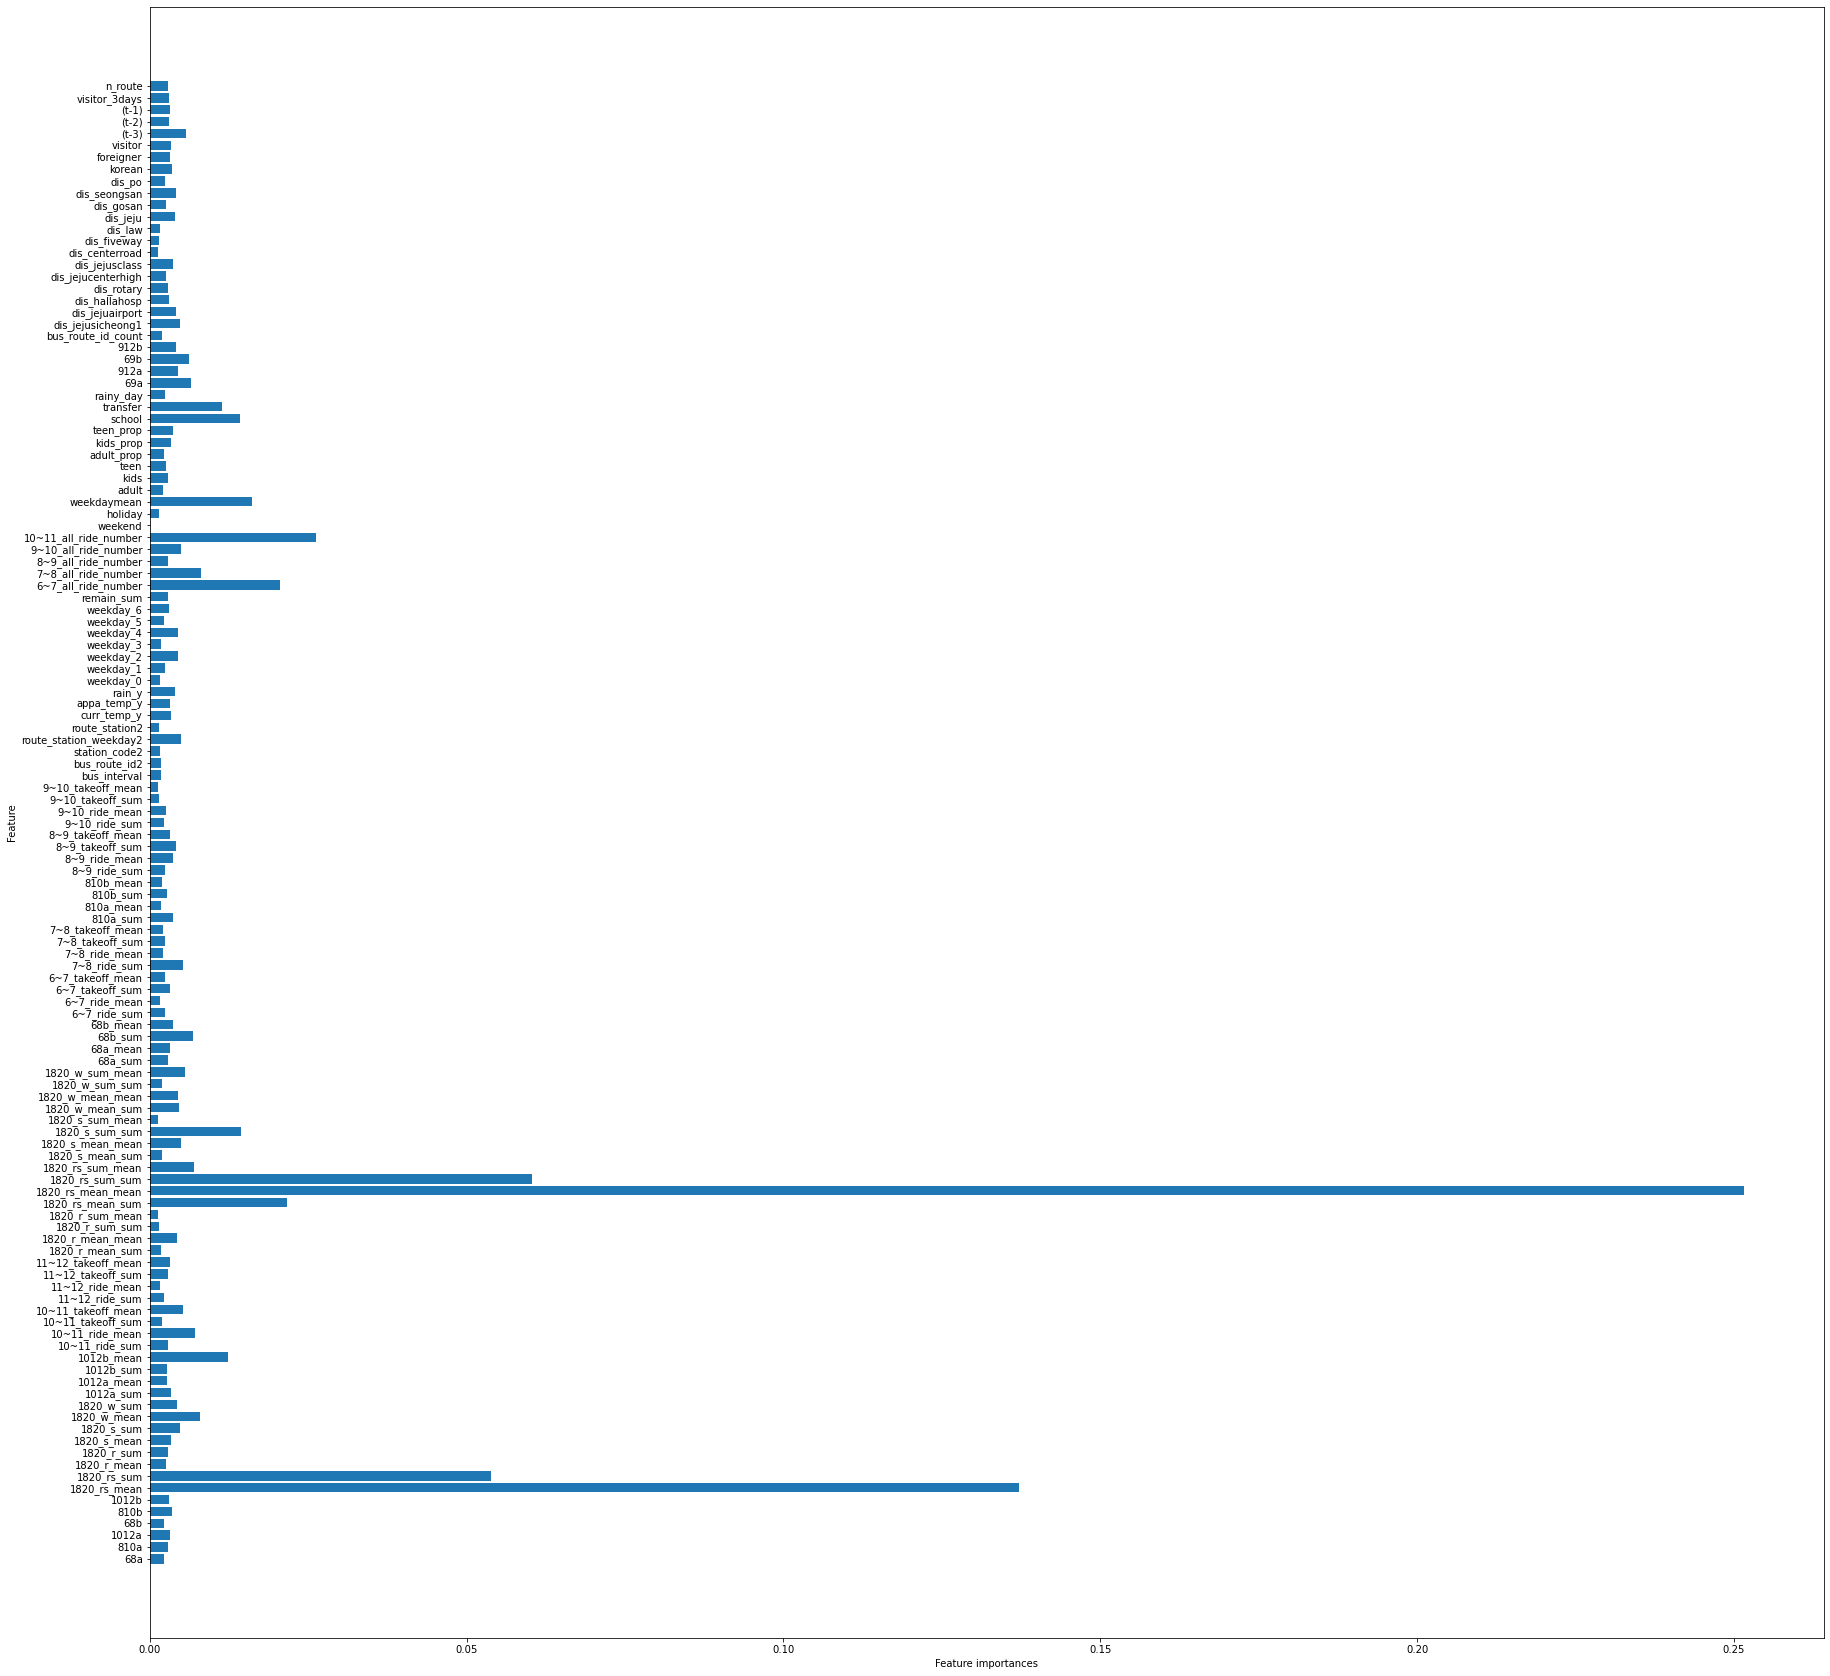

In [188]:
plot_feature_importances(xgb_fold_fit, train_data[input_var_0])

In [189]:
y_pred = xgb_fold_fit.predict(test_data[input_var_0])
sub = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\submission_sample.csv')
sub['18~20_ride'] = y_pred
sub.to_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\xgb.csv', index = False)

In [190]:
# from sklearn.ensemble import VotingRegressor

# single_models = [
#     ('lgb_reg', lgbm_fold_fit),
#     ('rf_reg', rfr_fold_fit),
#     ('gb_reg', gbr_fold_fit),
#     ('xgb_reg', xgb_fold_fit)
# ]

# n_splits = 5
# kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

# i = 1
# total_error = 0

# X = np.array(train_data[input_var_0])
# Y = np.array(y_train.values.ravel())

# voting_regressor = VotingRegressor(single_models, n_jobs=-1)
# for train_index, test_index in kfold.split(X):
#     x_train_fold, x_test_fold = X[train_index], X[test_index]
#     y_train_fold, y_test_fold = Y[train_index], Y[test_index]
#     voting_regressor_fit = voting_regressor.fit(x_train_fold, y_train_fold)
#     voting_regressor_pred = voting_regressor_fit.predict(x_test_fold)
#     error = np.sqrt(mean_squared_error(y_test_fold, voting_regressor_pred))
#     print('Fold = {}, prediction score = {:.2f}'.format(i, error))
#     total_error += error
#     i+=1

# print('---'*10)
# print('Average Error: %s' % (total_error / n_splits))
# # Average Error: 2.146014

In [191]:
# from sklearn.ensemble import StackingRegressor

# stack_models = [
#     ('lgb_reg', lgbm_fold_fit),
#     ('rf_reg', rfr_fold_fit),
#     ('gb_reg', gbr_fold_fit),
#     ('xgb_reg', xgb_fold_fit)
# ]

# n_splits = 5
# kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

# i = 1
# total_error = 0

# X = np.array(train_data[input_var_0])
# Y = np.array(y_train.values.ravel())

# lgbm = lgb.LGBMRegressor(  learning_rate=0.05,
#                                 n_jobs=-1,
#                                 device_type='gpu',
#                                 n_estimators=10000,
#                                 random_state=1, 
#                                 colsample_bytree=0.9, 
#                                 subsample=0.7, 
#                                 max_depth=5)

# stack_reg = StackingRegressor(stack_models, final_estimator=lgbm, n_jobs=-1)
# for train_index, test_index in kfold.split(X):
#     x_train_fold, x_test_fold = X[train_index], X[test_index]
#     y_train_fold, y_test_fold = Y[train_index], Y[test_index]
#     stack_reg_fit = stack_reg.fit(x_train_fold, y_train_fold)
#     stack_reg_pred = stack_reg_fit.predict(x_test_fold)
#     error = np.sqrt(mean_squared_error(y_test_fold, stack_reg_pred))
#     print('Fold = {}, prediction score = {:.2f}'.format(i, error))
#     total_error += error
#     i+=1

# print('---'*10)
# print('Average Error: %s' % (total_error / n_splits))

## 소요시간이 길고 예측 값도 좋지 않음 (2.63)


In [192]:
# final_outputs = {
#     'randomforest': rfr_fold_pred,
#     'xgboost': xgb_fold_pred,
#     'lgbm': lgbm_fold_pred,
#     'gradient' : gbr_fold_pred
# }

# final_prediction = final_outputs['randomforest'] * 0.25 + final_outputs['xgboost'] * 0.25 + final_outputs['lgbm'] * 0.25 + final_outputs['gradient'] * 0.25
# print("Error : ", np.sqrt(mean_squared_error(y_train, final_prediction)))



In [193]:
from sklearn.ensemble import VotingRegressor

single_models = [
    ('lgb_reg', lgbm_fold_fit),
    ('rf_reg', rfr_fold_fit),
    ('xgb_reg', xgb_fold_fit)
]

n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

i = 1
total_error = 0

X = np.array(train_data[input_var_0])
Y = np.array(y_train.values.ravel())

voting_regressor = VotingRegressor(single_models, n_jobs=-1)
for train_index, test_index in kfold.split(X):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    voting_regressor_fit = voting_regressor.fit(x_train_fold, y_train_fold)
    voting_regressor_pred = voting_regressor_fit.predict(x_test_fold)
    error = np.sqrt(mean_squared_error(y_test_fold, voting_regressor_pred))
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1

print('---'*10)
print('Average Error: %s' % (total_error / n_splits))   
# 41분 2.090748

Fold = 1, prediction score = 2.07
Fold = 2, prediction score = 2.02
Fold = 3, prediction score = 2.13
Fold = 4, prediction score = 2.18
Fold = 5, prediction score = 2.05
------------------------------
Average Error: 2.0898274274946163


In [194]:
voting_regressor_fit.named_estimators

{'lgb_reg': LGBMRegressor(colsample_bytree=0.78, device_type='gpu', learning_rate=0.05,
               max_depth=7, n_estimators=1000, random_state=1, subsample=0.6),
 'rf_reg': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=1),
 'xgb_reg': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.78, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)}

In [195]:
y_pred = voting_regressor_fit.predict(test_data[input_var_0])
sub = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\submission_sample.csv')
sub['18~20_ride'] = y_pred
sub.to_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\voting_lrx.csv', index = False)

In [196]:
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_error

lgbm = lgb.LGBMRegressor(
        objective='regression',
        boosting_type='gbdt',
        metric='rmse',
        n_jobs=-1,
        learning_rate=0.003,
        num_leaves= 700,
        max_depth=-1,
        min_child_weight=5,
        colsample_bytree= 0.3,
        subsample=0.7,
        n_estimators=20000,
        gamma=0,
        reg_lambda=0.05,
        reg_alpha=0.05,
        verbose=-1,
        seed=1,
        early_stopping_rounds=50
    )

X = train_data[input_var_0]
y = y_train


X.columns=range(len(X.columns))

evals = [(X, y)]
lgbm.fit(X, y, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=100)

y_pred = lgbm.predict(X)
print(np.sqrt(mean_squared_error(y_train, y_pred)))

# # 1. 1.7107090145880506
# # 2. Parameter 바꾼 후 Overfitting의 영향인지 모르겠지만
# # 지속적으로 감소됨, 지정한 50000번을 반복 수행하고 끝남
# # [50000]	training's rmse: 0.31192 -> Error 나중에 다시 실행

# test_pred = lgbm.predict(train_data[input_var_0])
# submission_sample = y_train
# submission_sample['predict'] = test_pred
# submission_sample.head(50)


y_pred = lgbm.predict(test_data[input_var_0])
sub = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\submission_sample.csv')
sub['18~20_ride'] = y_pred
sub.to_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\ov_lgbm.csv', index = False)


C:\Users\hskang\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\hskang\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=50 will be ignored. Current value: early_stopping_round=100
[100]	training's rmse: 3.76815
[200]	training's rmse: 3.09676
[300]	training's rmse: 2.63207
[400]	training's rmse: 2.31473
[500]	training's rmse: 2.09979
[600]	training's rmse: 1.95141
[700]	training's rmse: 1.84471
[800]	training's rmse: 1.76518
[900]	training's rmse: 1.70166
[1000]	training's rmse: 1.64899
[1100]	training's rmse: 1.60379
[1200]	training's rmse: 1.56311
[1300]	training's rmse: 1.52665
[1400]	training's rmse: 1.49273
[1500]	training's rmse: 1.46165
[1600]	training's rmse: 1.43237
[1700]	training's rmse: 1.40562
[1800]	training's rmse: 1.38029
[1900]	training's rmse: 1.35648
[2000]	training's rmse: 1.33401
[2100]	training's rmse: 1.31259
[2200]	training's rmse: 1.2926
[2300]	training's rmse: 1.27387
[2400]	training's rmse: 1.25612
[2500]	training's rmse: 1.23992
[2600]	training's rmse: 1.22

In [197]:
# from sklearn.ensemble import VotingRegressor

# single_models = [
#     ('lgb_reg', lgbm_fold_fit),
#     ('xgb_reg', xgb_fold_fit)
# ]

# n_splits = 5
# kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

# i = 1
# total_error = 0

# X = np.array(train_data[input_var_0])
# Y = np.array(y_train.values.ravel())

# voting_regressor = VotingRegressor(single_models, n_jobs=-1)
# for train_index, test_index in kfold.split(X):
#     x_train_fold, x_test_fold = X[train_index], X[test_index]
#     y_train_fold, y_test_fold = Y[train_index], Y[test_index]
#     voting_regressor_fit = voting_regressor.fit(x_train_fold, y_train_fold)
#     voting_regressor_pred = voting_regressor_fit.predict(x_test_fold)
#     error = np.sqrt(mean_squared_error(y_test_fold, voting_regressor_pred))
#     print('Fold = {}, prediction score = {:.2f}'.format(i, error))
#     total_error += error
#     i+=1

# print('---'*10)
# print('Average Error: %s' % (total_error / n_splits))
# # Average Error: 2.143389

In [198]:
# from sklearn.ensemble import VotingRegressor

# single_models = [
#     ('lgb_reg', lgbm_fold_fit),
#     ('rf_reg', rfr_fold_fit)
# ]

# n_splits = 5
# kfold = KFold(n_splits=n_splits, random_state=1, shuffle=True)

# i = 1
# total_error = 0

# X = np.array(train_data[input_var_0])
# Y = np.array(y_train.values.ravel())

# voting_regressor = VotingRegressor(single_models, n_jobs=-1)
# for train_index, test_index in kfold.split(X):
#     x_train_fold, x_test_fold = X[train_index], X[test_index]
#     y_train_fold, y_test_fold = Y[train_index], Y[test_index]
#     voting_regressor_fit = voting_regressor.fit(x_train_fold, y_train_fold)
#     voting_regressor_pred = voting_regressor_fit.predict(x_test_fold)
#     error = np.sqrt(mean_squared_error(y_test_fold, voting_regressor_pred))
#     print('Fold = {}, prediction score = {:.2f}'.format(i, error))
#     total_error += error
#     i+=1

# print('---'*10)
# print('Average Error: %s' % (total_error / n_splits))
# # Average Error: 2.1404

In [199]:
# y_pred = voting_regressor_fit.predict(test_data[input_var_0])
# sub = pd.read_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\submission_sample.csv')
# sub['18~20_ride'] = y_pred
# sub.to_csv('c:\\Users\\hskang\\Desktop\\Coding\\Python AI\\Datas\\fold_lx_voting_.csv', index = False)